Equivalent permeability prediction of vugular porous media using machine learning algorithms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')#, force_remount=True)

Mounted at /content/drive


In [ ]:
# library & dataset
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import matplotlib.pyplot as plt

In [ ]:
import math
from statistics import mean
import os

In [ ]:
if (True):
  import os
  #os.chdir("drive/My Drive/")  #MAPEAR PARA O LOCAL NO DRIVE ONDE SE ENCONTRA ESSE ARQUIVO
  os.chdir("drive/My Drive/Petrobras - Meio Fraturado/Vugs Artificiais/Programas/Rotina - Test4/")

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.2 MB/s eta 0:00:00


In [ ]:
os.chdir("..")

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Petrobras - Meio Fraturado/Vugs Artificiais/Programas'

In [ ]:
os.chdir("Rotina - Test4/")

##Load

Load round 1 and 2 python for trainning and test

In [ ]:
#summary_properties = pd.read_csv('data_summary.txt', sep=',')
summary_properties = pd.read_csv('imagedata_consolidation-round12.txt', sep=',')
summary_properties = summary_properties[(summary_properties.keq_simulation>0) & (summary_properties.Macroporosity<0.41)]

In [ ]:
summary_properties_check = pd.read_csv('imagedata_consolidation-round1.txt', sep=',')
summary_properties_check = summary_properties_check[['Macroporosity','Vugs','Count','Sample','Grid','R','P_Area_100','Perimeter','keq_simulation']]

In [ ]:
summary_properties_check[(summary_properties_check.Macroporosity==0.3)]

,Macroporosity,Vugs,Count,Sample,Grid,R,P_Area_100,Perimeter,keq_simulation
85,0.3,525,310,aleatory,grid-10,r1,0.264814,0.068263,1.99554
86,0.3,525,273,aleatory,grid-15,r1,0.281553,0.099325,2.19744
87,0.3,525,151,aleatory,grid-19,r1,0.300171,0.382899,2.87412
88,0.3,525,525,aleatory,grid-20,r1,0.298451,0.042860,2.19310
89,0.3,525,525,aleatory,grid-30,r1,0.295940,0.042368,1.88198
211,0.3,225,146,aleatory,grid-15,r2,0.267632,0.094034,1.96961
212,0.3,225,125,aleatory,grid-23,r2,0.282268,0.146579,1.99579
213,0.3,225,67,aleatory,grid-29,r2,0.299406,0.670102,3.15156
214,0.3,225,211,aleatory,grid-30,r2,0.298752,0.075193,2.26170
215,0.3,225,225,aleatory,grid-40,r2,0.298086,0.065153,1.92466


In [ ]:
summary_properties = summary_properties[['Count','P_Area_100','WAv_Lx','Alignment','Alignment2','Eccent','WAv_ly','Lx_norm','Ly_norm','Perimeter','EquivDiameter','Major','Minor','DifMajorMinor','Av_Area','Std_area','var_Area','Std_Lx','var_Lx','keq_simulation']]
summary_properties.head()

,Count,P_Area_100,WAv_Lx,Alignment,Alignment2,Eccent,WAv_ly,Lx_norm,Ly_norm,Perimeter,EquivDiameter,Major,Minor,DifMajorMinor,Av_Area,Std_area,var_Area,Std_Lx,var_Lx,keq_simulation
0,35,0.019775,1.91771,0.693349,0.010000,0.118698,1.90005,0.019177,0.038001,0.042552,79.6558,80.0045,79.3740,0.630436,0.056501,17.6184,310.408,0.000226,5.116330e-08,1.04175
1,32,0.019612,2.10715,0.622380,0.094477,0.209274,2.02309,0.021071,0.040462,0.048029,85.6206,91.3048,82.7560,8.548780,0.061289,1740.7300,3030150.000,0.003760,1.413980e-05,1.04186
2,34,0.019793,2.02455,0.615546,0.057397,0.160702,1.90886,0.020245,0.038177,0.044856,81.5981,85.6059,79.4396,6.166280,0.058216,867.4300,752435.000,0.003252,1.057780e-05,1.04273
3,35,0.019804,1.92112,0.570324,0.010000,0.123618,1.91227,0.019211,0.038246,0.042552,79.7133,80.0747,79.4193,0.655418,0.056582,17.8480,318.550,0.000250,6.259650e-08,1.04259
4,35,0.019769,1.91496,0.613697,0.010000,0.112626,1.90343,0.019150,0.038068,0.042542,79.6444,79.9597,79.3955,0.564184,0.056484,17.4312,303.845,0.000260,6.764610e-08,1.04129


In [ ]:
summary_properties.describe()

,Count,P_Area_100,WAv_Lx,Alignment,Alignment2,Eccent,WAv_ly,Lx_norm,Ly_norm,Perimeter,EquivDiameter,Major,Minor,DifMajorMinor,Av_Area,Std_area,var_Area,Std_Lx,var_Lx,keq_simulation
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,4.640000e+02,464.000000,4.640000e+02,464.000000
mean,175.961207,0.195428,3.768419,0.528205,0.158181,0.329609,3.734976,0.037684,0.074700,0.122691,138.195124,184.099973,130.760523,53.339450,0.142799,8449.724472,3.776949e+08,0.009698,2.719177e-04,1.808350
std,131.768854,0.107233,2.844566,0.050799,0.150241,0.211045,2.782732,0.028446,0.055655,0.192130,73.136508,157.159186,77.474377,82.638581,0.113021,17520.223585,1.985854e+09,0.013351,8.397102e-04,0.796453
min,13.000000,0.019557,1.908080,0.345158,0.000011,0.091928,1.900050,0.019081,0.038001,0.042367,79.552900,79.843600,79.325000,0.511645,0.056355,12.973700,1.683160e+02,0.000147,2.167530e-08,1.040680
25%,77.000000,0.099313,2.223228,0.501221,0.010000,0.124565,2.215287,0.022232,0.044306,0.051447,90.559600,103.652250,82.875700,0.696711,0.066019,27.991550,7.835310e+02,0.000242,5.838275e-08,1.246563
50%,140.000000,0.198624,3.009875,0.533693,0.114519,0.286405,2.950015,0.030099,0.059000,0.069629,121.993500,135.015000,121.661500,24.728050,0.132427,3329.735000,1.108710e+07,0.006156,3.790035e-05,1.588900
75%,248.250000,0.282424,3.845613,0.563245,0.273301,0.521754,3.821028,0.038456,0.076421,0.098247,148.749250,191.057250,132.042500,66.769825,0.159379,7877.145000,6.204938e+07,0.012200,1.488445e-04,2.152955
max,700.000000,0.399772,24.803600,0.693349,0.619245,0.803586,23.889600,0.248036,0.477792,1.760950,605.435000,1235.180000,696.498000,565.277000,0.949064,154326.000000,2.381660e+10,0.095065,9.037320e-03,6.953050


Load round 3 python for validation

In [ ]:
#old_matlab = pd.read_csv('data-imgesim-test5-seed1-matlab.csv', sep=',')
matlab = pd.read_csv('data-all-test4-seed.csv', sep=',')
#old_matlab = summary_properties[(summary_properties.Macroporosity<0.50) & (summary_properties.keq_simulation>0)]
old_matlab = matlab
old_matlabtest = matlab[(matlab.Seed!=1)]
len(old_matlab)
old_matlab.head()

,K_m2,K_eq_m2,keq_kpm,Throat_Lx,Av_VugArea,P_Area,P_Area_100,Perim,R,Perimeter-H_At,...,WAv_Ly,WAv_Lx_semcalc,Eccent,MinorLenght,Macroporosity,Vugs,Sample,Grid,Seed,WAv_Lx
0,1.000000e-15,1.110000e-15,1.11461,0,0,4.971231,0.049712,4115.296,0,6.573955,...,1.000000,41.481698,0.192006,36.891447,5,38,1,15,1,3.315883
1,1.000000e-15,1.110000e-15,1.11123,0,0,4.934838,0.049348,3912.324,0,6.249719,...,1.250000,39.334342,0.369456,36.551450,5,38,1,23,1,3.144232
2,1.000000e-15,1.120000e-15,1.11733,0,0,5.043505,0.050435,4212.166,0,6.728700,...,1.444444,42.081702,0.160024,36.322614,5,38,1,29,1,3.363845
3,1.000000e-15,1.110000e-15,1.11218,0,0,5.041334,0.050413,4238.298,0,6.770444,...,1.000000,38.504889,0.234967,36.270279,5,38,1,30,1,3.077929
4,1.000000e-15,1.110000e-15,1.10744,0,0,5.040440,0.050404,4246.346,0,6.783300,...,1.250000,36.417729,0.101774,36.281277,5,38,1,40,1,2.911089


## Matlab - Curve fitting

In [ ]:
def testpython_func(df):

  X = df.loc[:,"P_Area_100"]
  Y = df.loc[:,"keq_simulation"]
  phi_m = df.loc[:,"P_Area_100"]
  lx = df.loc[:,"WAv_Lx"]
  orient = df.loc[:,"Alignment"]
  ecc = df.loc[:,"Eccent"]
  keq_fit = 1 + (7.0284*(df['P_Area_100']**1.6597)*(df['WAv_Lx']**0.4687)*(df['Alignment']**0.3934)*(df['Eccent']**0.0809))
  return X,Y,keq_fit

Xtrain,Ytrain,Ypredtrain = testpython_func(summary_properties)

In [ ]:
def test_func(df):
  X = df.loc[:,"P_Area_100"]
  Y = df.loc[:,"keq_kpm"]
  phi_m = df.loc[:,"P_Area_100"]
  lx = df.loc[:,"WAv_Lx"]
  orient = df.loc[:,"Alignment"]
  ecc = df.loc[:,"Eccent"]
  keq_fit = 1 + (7.0284*(df['P_Area_100']**1.6597)*(df['WAv_Lx']**0.4687)*(df['Alignment']**0.3934)*(df['Eccent']**0.0809))
  return X,Y,keq_fit

Xtest,Ytest,Ypredtest = test_func(old_matlab)

In [ ]:
def ErrRel(Y, Ypred):
  return mean((abs(Y - Ypred))/Y)*100

def ErrRel2(Y, Ypred):
  return (sum(abs(Ypred - Y))/sum(Y))*100

def goodfit(Y,Ypred):
  absError = Ypred - Y

  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  print("RMSE: %2.5f \t R-squared: %2.5f \t Dev: %2.2f \t Dev2: %2.2f \n" % (RMSE,Rsquared,ErrRel(Y,Ypred),ErrRel2(Y,Ypred)))
  return

print("Test-Matlab\t")
goodfit(Ytest,Ypredtest)
print("Test-Python\t")
goodfit(Ytrain,Ypredtrain)

Test-Matlab	
RMSE: 0.18497 	 R-squared: 0.96034 	 Dev: 6.18 	 Dev2: 6.51 

Test-Python	
RMSE: 0.19452 	 R-squared: 0.94257 	 Dev: 5.99 	 Dev2: 6.73 



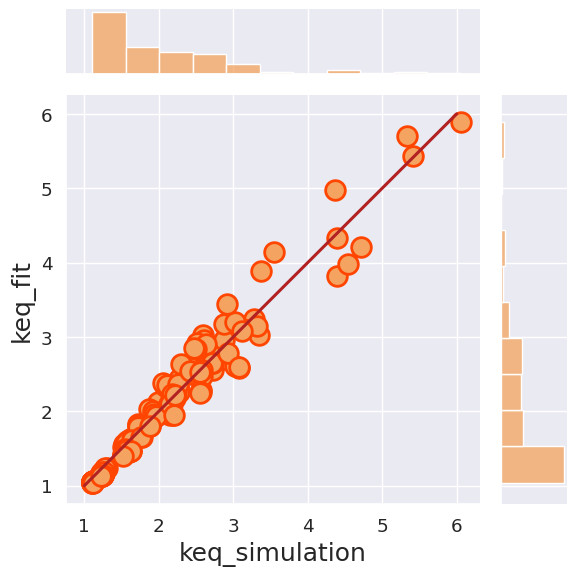

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.2)
df = pd.DataFrame({'simulation':Ytest,'prediction': Ypredtest})
sns_plot = sns.jointplot(data=df,x='simulation',y='prediction', kind='scatter', s=200, color="sandybrown", edgecolor="orangered", linewidth=2) #xlim=[0.9,2.1], ylim=[0.9,2.1] ,
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="firebrick", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

## Data


In [ ]:
summary_properties.shape

(464, 20)

P_Area_100           Axes(0.125,0.53;0.168478x0.35)
keq_simulation    Axes(0.327174,0.53;0.168478x0.35)
dtype: object

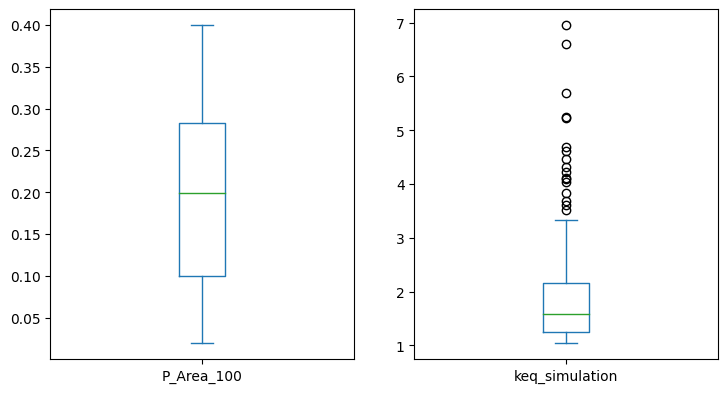

In [ ]:
summary_properties.plot(column=['P_Area_100','keq_simulation'],kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (18,10))

P_Area_100           Axes(0.125,0.53;0.168478x0.35)
keq_simulation    Axes(0.327174,0.53;0.168478x0.35)
dtype: object

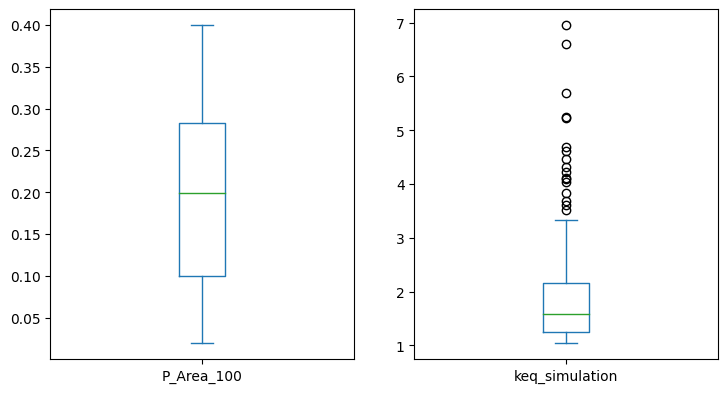

In [ ]:
summary_properties.plot(column=['P_Area_100','keq_simulation'],kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (18,10))

<Figure size 400x200 with 0 Axes>

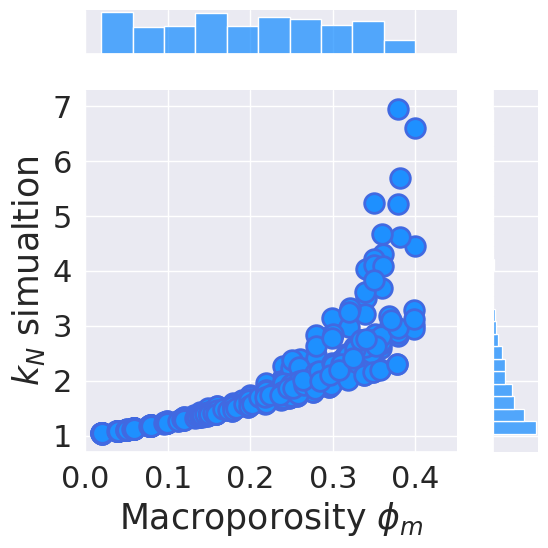

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
fig = plt.figure(figsize=[4,2])
sns.set(font_scale=2)
sns_plot = sns.jointplot(data=summary_properties,x=summary_properties.P_Area_100,y=summary_properties.keq_simulation, xlim=[0.0,0.45] ,kind='scatter', s=200, color="dodgerblue", edgecolor="royalblue", linewidth=2) #
#sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('Macroporosity $\phi_m$', '$k_N$ simualtion', fontsize=25)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...
sns_plot.ax_joint.set_yticks([1,2,3,4,5,6,7])
sns_plot.ax_joint.set_xticks([0.0,0.1,0.2,0.3,0.4])
sns_plot.ax_marg_x.set_xlim(0, 0.45)
sns_plot.ax_marg_y.set_ylim(0.7, 7.3)

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

In [ ]:
summary_properties.isnull().sum()

Count             0
P_Area_100        0
WAv_Lx            0
Alignment         0
Alignment2        0
Eccent            0
WAv_ly            0
Lx_norm           0
Ly_norm           0
Perimeter         0
EquivDiameter     0
Major             0
Minor             0
DifMajorMinor     0
Av_Area           0
Std_area          0
var_Area          0
Std_Lx            0
var_Lx            0
keq_simulation    0
dtype: int64

Stats

In [ ]:
relation = summary_properties.corr()
relation_index = relation.index
relation_index

Index(['Count', 'P_Area_100', 'WAv_Lx', 'Alignment', 'Alignment2', 'Eccent',
       'WAv_ly', 'Lx_norm', 'Ly_norm', 'Perimeter', 'EquivDiameter', 'Major',
       'Minor', 'DifMajorMinor', 'Av_Area', 'Std_area', 'var_Area', 'Std_Lx',
       'var_Lx', 'keq_simulation'],
      dtype='object')

<Axes: >

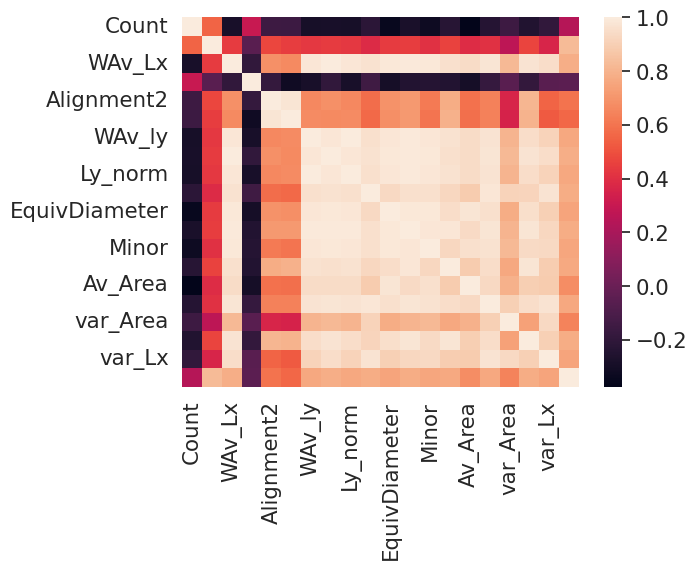

In [ ]:
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(summary_properties[relation_index].corr(),annot=False)

##Tree Regressor

In [ ]:
# Feature selection by ExtraTreesRegressor(model based)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [ ]:
X_headers = ['Count','P_Area_100','WAv_Lx','Alignment','Alignment2','Eccent','WAv_ly','Lx_norm','Ly_norm','Perimeter','EquivDiameter','Major','Minor','DifMajorMinor','Av_Area','Std_area','var_Area','Std_Lx','var_Lx']
X = summary_properties[X_headers].values
y = summary_properties.loc[:,'keq_simulation'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
# Fixing random state for reproducibility
np.random.seed(154)
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=154)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**ExtraTreesRegressor**
This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
reg_extra = ExtraTreesRegressor()
reg_extra.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
reg_extra.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
print(reg_extra.score(X_train,y_train),reg_extra.score(X_test,y_test))
y_pred_extra = reg_extra.predict(X_test)

1.0 0.9781615403741044


In [ ]:
# With hyperparameter tuned

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred_extra))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_extra))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_extra)))

def goodfit(Y,Ypred):
  absError = Ypred - Y

  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  return Rsquared
print('R2:', goodfit(y_test, y_pred_extra))

MAE: 0.04509319677419364
MSE: 0.013671321793339493
RMSE: 0.11692442770156924
R2: 0.9783638048743061


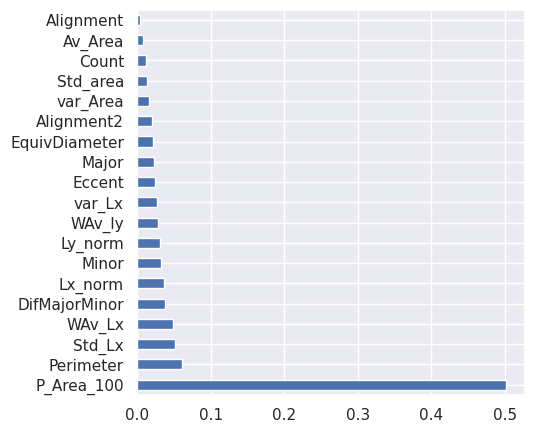

In [ ]:
sns.set(font_scale=1.0)
plt.rcParams["figure.figsize"] = (5, 5)
# Create two subplots and unpack the output array immediately
feat_importances_extra = pd.Series(reg_extra.feature_importances_, index=X_headers)
feat_importances_extra.nlargest(20).plot(kind='barh')
plt.show()

XGBoost

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_tree

In [ ]:
# fit model no training data
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
print(xgb.score(X_train,y_train),xgb.score(X_test,y_test))
y_xgb = xgb.predict(X_test)

0.9999982934396513 0.988533225397878


In [ ]:
# With hyperparameter tuned

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_xgb))
print('MSE:', metrics.mean_squared_error(y_test, y_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_xgb)))

def goodfit(Y,Ypred):
  absError = Ypred - Y

  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  return Rsquared

print('R2:', goodfit(y_test, y_xgb))

MAE: 0.03846314764289445
MSE: 0.007178435118721148
RMSE: 0.08472564616880268
R2: 0.9885444914516458


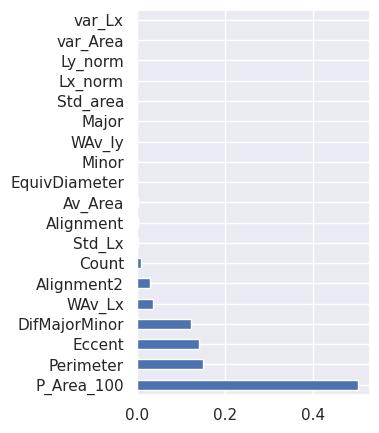

In [ ]:
# Create two subplots and unpack the output array immediately
plt.rcParams["figure.figsize"] = (3, 5)
feat_importances_xgb = pd.Series(xgb.feature_importances_, index=X_headers)
feat_importances_xgb.nlargest(20).plot(kind='barh')
plt.show()

Random

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from scipy.optimize import curve_fit


In [ ]:
# Train classifiers
reg1 = GradientBoostingRegressor(random_state=154)
reg2 = RandomForestRegressor(random_state=154)

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)

pred1 = reg1.predict(X_test)
y_reg2 = reg2.predict(X_test)

In [ ]:
print(reg1.score(X_train,y_train),reg1.score(X_test,y_test))
y_reg1 = reg1.predict(X_test)

0.9990956784146628 0.9779698797371958


In [ ]:
# With hyperparameter tuned

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_reg1))
print('MSE:', metrics.mean_squared_error(y_test, y_reg1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_reg1)))

def goodfit(Y,Ypred):
  absError = Ypred - Y

  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  return Rsquared

print('R2:', goodfit(y_test, y_reg1))

MAE: 0.04115768899222068
MSE: 0.013791305266861892
RMSE: 0.11743638817190305
R2: 0.9782976332091315


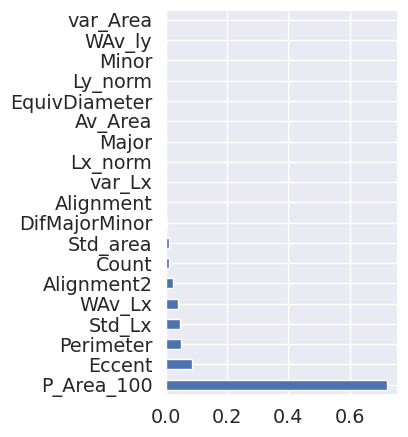

In [ ]:
# Create two subplots and unpack the output array immediately
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (3, 5)
feat_importances_reg1 = pd.Series(reg1.feature_importances_, index=X_headers)
feat_importances_reg1.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
# With hyperparameter tuned

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_reg2))
print('MSE:', metrics.mean_squared_error(y_test, y_reg2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_reg2)))

def goodfit(Y,Ypred):
  absError = Ypred - Y

  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  return Rsquared

print('R2:', goodfit(y_test, y_reg2))

MAE: 0.04412091075268817
MSE: 0.009771891054949371
RMSE: 0.09885287580515487
R2: 0.9845368018407497


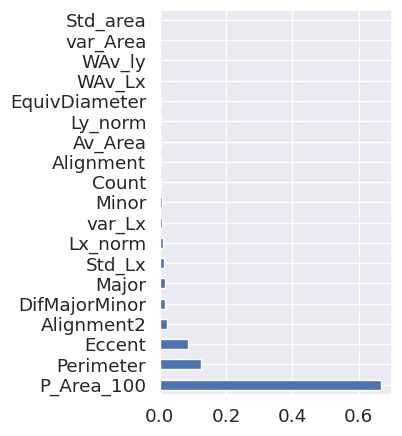

In [ ]:
# Create two subplots and unpack the output array immediately
sns.set(font_scale=1.2)
plt.rcParams["figure.figsize"] = (3, 5)
feat_importances_reg2 = pd.Series(reg2.feature_importances_, index=X_headers)
feat_importances_reg2.nlargest(20).plot(kind='barh')
plt.show()

##Grid search 2

In [ ]:
from sklearn.preprocessing import StandardScaler
# Fixing random state for reproducibility
np.random.seed(154)
sc = StandardScaler()

#['P_Area_100','WAv_Lx','Alignment2','Eccent','Lx_norm','Perimeter','DifMajorMinor','Std_Lx','var_Lx']
X2_headers = ['P_Area_100','Alignment2','Eccent','Perimeter','DifMajorMinor','Std_Lx']
summary_properties = pd.read_csv('imagedata_consolidation-round12.txt', sep=',')
summary_properties = summary_properties[(summary_properties.keq_simulation>0) & (summary_properties.Macroporosity<0.41)]
X = summary_properties[X2_headers].values
y = summary_properties.loc[:,'keq_simulation'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=154)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape

(371, 6)

In [ ]:
### Mt tempo para rodar com pca ####

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
# Fixing random state for reproducibility
np.random.seed(154)

#reg_decision_model = DecisionTreeRegressor()

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = ExtraTreesRegressor()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
criterion=["squared_error"]
n_estimators=[10]
splitter = ["best","random"]
max_depth = [1,3,5,7,9,11,12]
min_samples_leaf = [1,2,3,4,5]
min_weight_fraction_leaf = [0.1,0.2,0.3,0.4,0.5]
max_features = ["auto","log2","sqrt",None]
max_leaf_nodes = [None,10,20,30,40,50,60,70,80,90]

n_components = list(range(1,X.shape[1]+1,1))
#criterion = ["friedman_mse", "mse"]
#max_depth = [4,6,8,10]
parameters = dict(pca__n_components=n_components,
                  dec_tree__max_depth=max_depth,
                  dec_tree__min_samples_leaf=min_samples_leaf,
                  dec_tree__min_weight_fraction_leaf=min_weight_fraction_leaf,
                  dec_tree__max_features=max_features,
                  dec_tree__max_leaf_nodes=max_leaf_nodes,
                  dec_tree__criterion=criterion,
                  dec_tree__n_estimators=n_estimators)

tuning_model = GridSearchCV(pipe,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
#tuning_model = GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)
tuning_model.fit(X,y)
tuning_model.best_score_

In [ ]:
tuning_model.best_score_
tuning_model.best_params_

{'dec_tree__criterion': 'squared_error',
 'dec_tree__max_depth': 7,
 'dec_tree__max_features': None,
 'dec_tree__max_leaf_nodes': 60,
 'dec_tree__min_samples_leaf': 4,
 'dec_tree__min_weight_fraction_leaf': 0.1,
 'dec_tree__n_estimators': 10,
 'pca__n_components': 4}

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
# Fixing random state for reproducibility
np.random.seed(154)

reg_decision_model = ExtraTreesRegressor()

parameters={"criterion":["squared_error","absolute_error"],
            "n_estimators":range(10, 500, 10),
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["log2","sqrt",1,6],
           "max_leaf_nodes":[5,10,20,30,40,50,60,70,80,90],
            "random_state":[154]}

#tuning_model = GridSearchCV(pipe,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)
tuning_model = GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3,n_jobs=-1)
tuning_model.fit(X_train,y_train)
tuning_model.best_score_

Fitting 3 folds for each of 686000 candidates, totalling 2058000 fits


KeyboardInterrupt: ignored

In [ ]:
tuning_model.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 10,
 'random_state': 154}

## Test Grid Search selected features

ExtraTrees
criterion='squared_error', max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1

{'dec_tree__criterion': 'squared_error',
 'dec_tree__max_depth': 7,
 'dec_tree__max_features': None,
 'dec_tree__max_leaf_nodes': 60,
 'dec_tree__min_samples_leaf': 4,
 'dec_tree__min_weight_fraction_leaf': 0.1,
 'dec_tree__n_estimators': 10,
 'pca__n_components': 4}

criterion='squared_error', max_depth= 5,
max_features = None,max_leaf_nodes= None,min_samples_leaf= 1,min_weight_fraction_leaf= 0.1, n_estimators= 10,random_state=154

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
tuned_hyper_extra_s2 = ExtraTreesRegressor(criterion='squared_error', max_depth= 7,
max_features = 6,max_leaf_nodes= 10,min_samples_leaf= 1,min_weight_fraction_leaf= 0.1, n_estimators= 490,random_state=154)

# fitting model
tuned_hyper_extra_s2.fit(X_train,y_train)
# prediction
tuned_extra_s2=tuned_hyper_extra_s2.predict(X_test)

In [ ]:
# With hyperparameter tuned

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, tuned_extra_s2))
print('MSE:', metrics.mean_squared_error(y_test, tuned_extra_s2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_extra_s2)))

def goodfit(Y,Ypred):
  absError = Ypred - Y

  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  return Rsquared
print('R2:', goodfit(y_test, tuned_extra_s2))

MAE: 0.1895860652820754
MSE: 0.1576849642478112
RMSE: 0.3970956613308828
R2: 0.7481746094986432


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


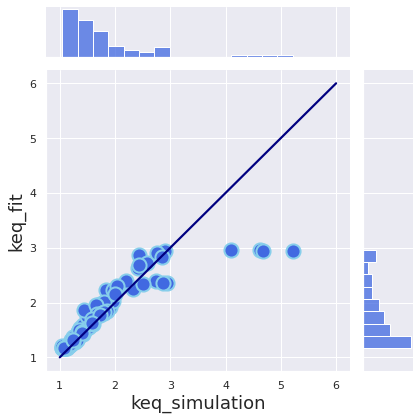

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.0)
sns_plot = sns.jointplot(y_test,tuned_extra_s2, kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2) #xlim=[0.9,2.1], ylim=[0.9,2.1] ,
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

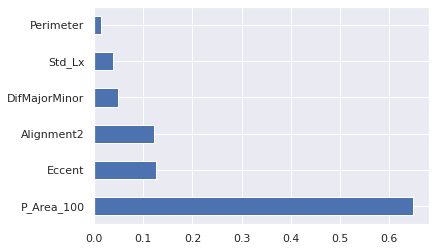

In [ ]:
feat_importances = pd.Series(tuned_hyper_extra_s2.feature_importances_, index=X2_headers)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Decision Tree best params
{'dec_tree__max_depth': 9, 'dec_tree__max_features': 'log2', 'dec_tree__max_leaf_nodes': None, 'dec_tree__min_samples_leaf': 6, 'dec_tree__min_weight_fraction_leaf': 0.1, 'dec_tree__splitter': 'best', 'pca__n_components': 3}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tuned_hyper_dec_s2= DecisionTreeRegressor()#splitter='best', max_depth=9, max_features='log2', max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1)

# fitting model
tuned_hyper_dec_s2.fit(X_train,y_train)
# prediction
tuned_dec_s2=tuned_hyper_dec_s2.predict(X_test)

In [ ]:
# With hyperparameter tuned

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_dec_s2))
print('MSE:', metrics.mean_squared_error(y_test, tuned_dec_s2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_dec_s2)))

def goodfit(Y,Ypred):
  absError = Ypred - Y

  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  return Rsquared
print('R2:', goodfit(y_test, tuned_dec_s2))

MAE: 0.06318096774193549
MSE: 0.031225406564516122
RMSE: 0.17670712086533502
R2: 0.9501351391876502


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


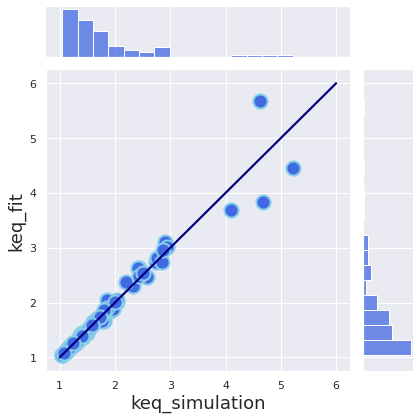

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.0)
sns_plot = sns.jointplot(y_test,tuned_dec_s2, kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2) #, xlim=[0.9,2.1], ylim=[0.9,2.1]
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

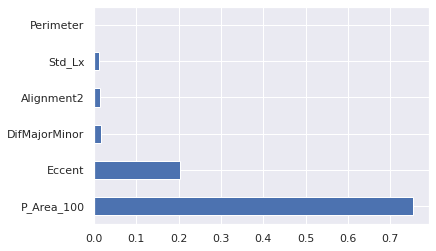

In [ ]:
feat_importances = pd.Series(tuned_hyper_dec_s2.feature_importances_, index=X2_headers)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

XGBoost

In [ ]:
from xgboost import XGBRegressor

# fit model no training data
tuned_hyper_xgb_s2 = XGBRegressor(colsample_bytree= 0.4, gamma= 0.0, learning_rate= 0.1, max_depth= 5, min_child_weight= 3, n_estimators= 100)
tuned_hyper_xgb_s2.fit(X_train, y_train)

[16:07:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, gamma=0.0, max_depth=5, min_child_weight=3)

In [ ]:
print(tuned_hyper_xgb_s2.score(X_train,y_train),tuned_hyper_xgb_s2.score(X_test,y_test))
tuned_xgb_s2 = tuned_hyper_xgb_s2.predict(X_test)

0.9972304104019338 0.9688490926345783


In [ ]:
# With hyperparameter tuned

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, tuned_xgb_s2))
print('MSE:', metrics.mean_squared_error(y_test, tuned_xgb_s2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_xgb_s2)))

def goodfit(Y,Ypred):
  absError = Ypred - Y

  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  return Rsquared

print('R2:', goodfit(y_test, tuned_xgb_s2))

MAE: 0.08148191544932704
MSE: 0.01950110429227336
RMSE: 0.13964635438232306
R2: 0.9704419473300704


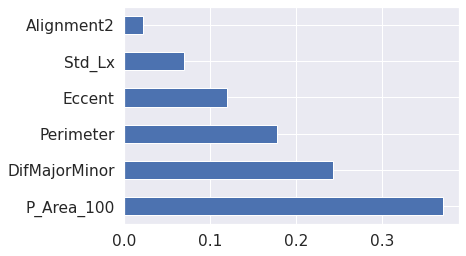

In [ ]:
# Create two subplots and unpack the output array immediately
feat_importances_xgb = pd.Series(tuned_hyper_xgb_s2.feature_importances_, index=X2_headers)
feat_importances_xgb.nlargest(20).plot(kind='barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


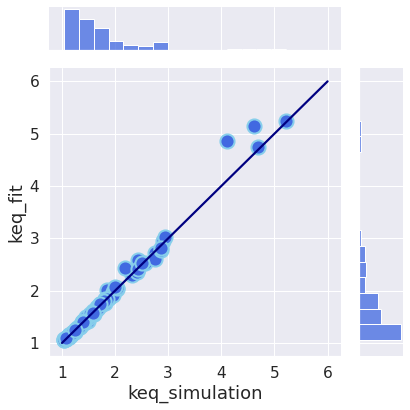

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(y_test, tuned_xgb_s2, kind='scatter' , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)#xlim=[0.9,2.1], ylim=[0.9,2.1]
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

In [ ]:
# With hyperparameter tuned

from sklearn import metrics

def goodfit(Y,Ypred):

  absError = Ypred - Y
  MAE = metrics.mean_absolute_error(Y,Ypred)
  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  return MAE,MSE,RMSE,Rsquared

print('Extra\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\n' % (goodfit(y_test, tuned_extra_s2)))
print('Decision MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\n' % (goodfit(y_test, tuned_dec_s2)))
print('XGBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\n' % (goodfit(y_test, tuned_xgb_s2)))

Extra	 MAE: 0.04488 	 MSE:0.01462 	 RMSE: 0.1209 	 R2: 0.977

Decision MAE: 0.06318 	 MSE:0.03123 	 RMSE: 0.1767 	 R2: 0.9501

XGBoost	 MAE: 0.0399 	 MSE:0.01135 	 RMSE: 0.1065 	 R2: 0.9823



## Refined Features

Extra XDB

In [ ]:
#summary_properties = pd.read_csv('data_summary.txt', sep=',')
summary_properties = pd.read_csv('imagedata_consolidation-round12.txt', sep=',')
summary_properties = summary_properties[(summary_properties.keq_simulation>0) & (summary_properties.Macroporosity<0.41)]

In [ ]:
from sklearn.preprocessing import StandardScaler
# Fixing random state for reproducibility
np.random.seed(154)
sc = StandardScaler()

#['P_Area_100','WAv_Lx','Alignment2','Eccent','Lx_norm','Perimeter','DifMajorMinor','Std_Lx','var_Lx']
#X2_headers = ['P_Area_100','Alignment2','Eccent','Perimeter','DifMajorMinor','Std_Lx']
X2_headers = ['P_Area_100','Alignment2','Eccent','Perimeter','WAv_Lx','Std_Lx']

X = summary_properties[X2_headers].values
y = summary_properties.loc[:,'keq_simulation'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=154)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape

(371, 6)

Nets

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
tuned_hyper_extra_s2 = ExtraTreesRegressor(random_state=154,n_estimators = 50)

# fitting model
tuned_hyper_extra_s2.fit(X_train,y_train)
# prediction
tuned_extra_s2=tuned_hyper_extra_s2.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tuned_hyper_dec_s2= DecisionTreeRegressor(random_state=154)

# fitting model
tuned_hyper_dec_s2.fit(X_train,y_train)
# prediction
tuned_dec_s2=tuned_hyper_dec_s2.predict(X_test)

In [ ]:
from xgboost import XGBRegressor

# fit model no training data
tuned_hyper_xgb_s2 = XGBRegressor(random_state=154,n_estimators = 50)
tuned_hyper_xgb_s2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=154, ...)

In [ ]:
print(tuned_hyper_xgb_s2.score(X_train,y_train),tuned_hyper_xgb_s2.score(X_test,y_test))
tuned_xgb_s2 = tuned_hyper_xgb_s2.predict(X_test)

0.9999481177677456 0.9467635606876983


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from scipy.optimize import curve_fit


In [ ]:
# Train classifiers
reg1 = GradientBoostingRegressor(random_state=154,n_estimators = 50)
reg2 = RandomForestRegressor(random_state=154,n_estimators = 50)
reg3 = LGBMRegressor(random_state=154,n_estimators = 50)

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lgbm", reg3)])
ereg.fit(X_train, y_train)

pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)
pred3 = reg3.predict(X_test)
pred4 = ereg.predict(X_test)

In [ ]:
# With hyperparameter tuned

from sklearn import metrics

def goodfit(Y,Ypred):

  absError = Ypred - Y
  MAE = metrics.mean_absolute_error(Y,Ypred)
  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  ErrRel = mean((abs(Y - Ypred))/Y)*100
  ErrRel2 = (sum(abs(Ypred - Y))/sum(Y))*100
  return MAE,MSE,RMSE,Rsquared,ErrRel,ErrRel2

print('Extra\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, tuned_extra_s2)))
print('Decision MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, tuned_dec_s2)))
print('XGBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, tuned_xgb_s2)))
print('GBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred1)))
print('RForest\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred2)))
print('Linear\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred3)))
print('Voting\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred4)))

Extra	 MAE: 0.04913 	 MSE:0.02558 	 RMSE: 0.1599 	 R2: 0.9596 	 Dev: 1.78 	 Dev2: 2.82

Decision MAE: 0.07445 	 MSE:0.07557 	 RMSE: 0.2749 	 R2: 0.8793 	 Dev: 2.44 	 Dev2: 4.27

XGBoost	 MAE: 0.05332 	 MSE:0.03333 	 RMSE: 0.1826 	 R2: 0.9469 	 Dev: 1.86 	 Dev2: 3.06

GBoost	 MAE: 0.0454 	 MSE:0.0131 	 RMSE: 0.1145 	 R2: 0.9794 	 Dev: 1.87 	 Dev2: 2.6

RForest	 MAE: 0.04396 	 MSE:0.01073 	 RMSE: 0.1036 	 R2: 0.9829 	 Dev: 1.78 	 Dev2: 2.52

Linear	 MAE: 0.1346 	 MSE:0.04823 	 RMSE: 0.2196 	 R2: 0.9235 	 Dev: 7.3 	 Dev2: 7.71

Voting	 MAE: 0.0589 	 MSE:0.01353 	 RMSE: 0.1163 	 R2: 0.9786 	 Dev: 2.83 	 Dev2: 3.38



In [ ]:
from sklearn.svm import SVR # para utilizar o algoritmo SVM
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge

# Criação do modelo e predições
svm = SVR()  # cria o modelo
lgbm = LGBMRegressor(random_state=154,n_estimators = 50)
cat = CatBoostRegressor(random_state=154,n_estimators = 50)
sgd = SGDRegressor(random_state=154)
kridge = KernelRidge()
elastic = ElasticNet(random_state=154)
bayes = BayesianRidge()

svm.fit(X_train, y_train)  # treina o modelo com o dataset de treino
lgbm.fit(X_train, y_train)
cat.fit(X_train, y_train)
sgd.fit(X_train, y_train)
kridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)
bayes.fit(X_train, y_train)

pred_svm = svm.predict(X_test)  # faz as predições com o dataset de teste
pred_lgbm = lgbm.predict(X_test)
pred_cat = cat.predict(X_test)
pred_sgd = sgd.predict(X_test)
pred_kridge = kridge.predict(X_test)
pred_elastic = elastic.predict(X_test)
pred_bayes = bayes.predict(X_test)

Learning rate set to 0.399832
0:	learn: 0.5714397	total: 1.55ms	remaining: 76.1ms
1:	learn: 0.4387635	total: 2.81ms	remaining: 67.6ms
2:	learn: 0.3447408	total: 5.28ms	remaining: 82.7ms
3:	learn: 0.2911860	total: 6.48ms	remaining: 74.5ms
4:	learn: 0.2554953	total: 7.63ms	remaining: 68.7ms
5:	learn: 0.2258144	total: 8.89ms	remaining: 65.2ms
6:	learn: 0.2008225	total: 10.1ms	remaining: 62.3ms
7:	learn: 0.1824523	total: 11.4ms	remaining: 60ms
8:	learn: 0.1708784	total: 12.7ms	remaining: 57.8ms
9:	learn: 0.1557876	total: 14ms	remaining: 55.8ms
10:	learn: 0.1414479	total: 15.2ms	remaining: 53.8ms
11:	learn: 0.1342863	total: 16.4ms	remaining: 52ms
12:	learn: 0.1234062	total: 17.6ms	remaining: 50.2ms
13:	learn: 0.1131889	total: 18.9ms	remaining: 48.7ms
14:	learn: 0.1070305	total: 20.4ms	remaining: 47.6ms
15:	learn: 0.0993574	total: 21.9ms	remaining: 46.4ms
16:	learn: 0.0950686	total: 23.3ms	remaining: 45.3ms
17:	learn: 0.0890348	total: 24.7ms	remaining: 44ms
18:	learn: 0.0842590	total: 26.2ms

In [ ]:
print('svm\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred_svm)))
print('lgbm\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred_lgbm)))
print('cat\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred_cat)))
print('sgd\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred_sgd)))
print('kridge\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred_kridge)))
print('elastic\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred_elastic)))
print('bayes\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.3g \t Dev2: %.3g\n' % (goodfit(y_test, pred_bayes)))

svm	 MAE: 0.08306 	 MSE:0.02371 	 RMSE: 0.154 	 R2: 0.9656 	 Dev: 4.12 	 Dev2: 4.76

lgbm	 MAE: 0.03881 	 MSE:0.008772 	 RMSE: 0.09366 	 R2: 0.9861 	 Dev: 1.62 	 Dev2: 2.22

cat	 MAE: 0.04888 	 MSE:0.008121 	 RMSE: 0.09012 	 R2: 0.9871 	 Dev: 2.54 	 Dev2: 2.8

sgd	 MAE: 0.1416 	 MSE:0.04746 	 RMSE: 0.2179 	 R2: 0.925 	 Dev: 7.71 	 Dev2: 8.12

kridge	 MAE: 1.804 	 MSE:3.3 	 RMSE: 1.817 	 R2: 0.9243 	 Dev: 118 	 Dev2: 103

elastic	 MAE: 0.4748 	 MSE:0.4412 	 RMSE: 0.6643 	 R2: 0.303 	 Dev: 28 	 Dev2: 27.2

bayes	 MAE: 0.1347 	 MSE:0.0481 	 RMSE: 0.2193 	 R2: 0.9238 	 Dev: 7.3 	 Dev2: 7.72



In [ ]:
test_dataset = pd.DataFrame({'y_test': y_test, 'extra': tuned_extra_s2, 'decision': tuned_dec_s2, 'xgboost': tuned_xgb_s2, 'gboost': pred1, 'rforest': pred2, 'linear': pred3, 'voting': pred4, 'svm': pred_svm, 'lgbm': pred_lgbm, 'catboost': pred_cat, 'sgd': pred_sgd, 'kridge': pred_kridge, 'elastic': pred_elastic, 'bayes': pred_bayes})

ExtraTrees

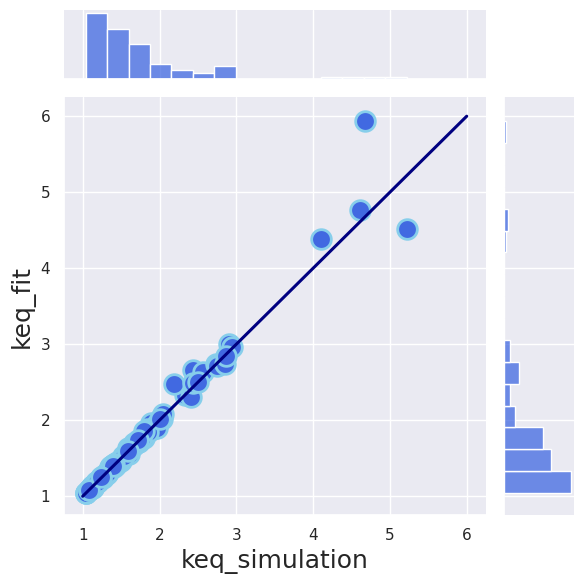

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.0)
sns_plot = sns.jointplot(data=test_dataset,x="y_test",y="extra", kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2) #xlim=[0.9,2.1], ylim=[0.9,2.1] ,
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

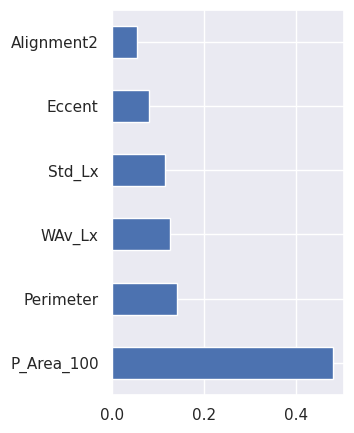

In [ ]:
feat_importances = pd.Series(tuned_hyper_extra_s2.feature_importances_, index=X2_headers)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Decision Tree

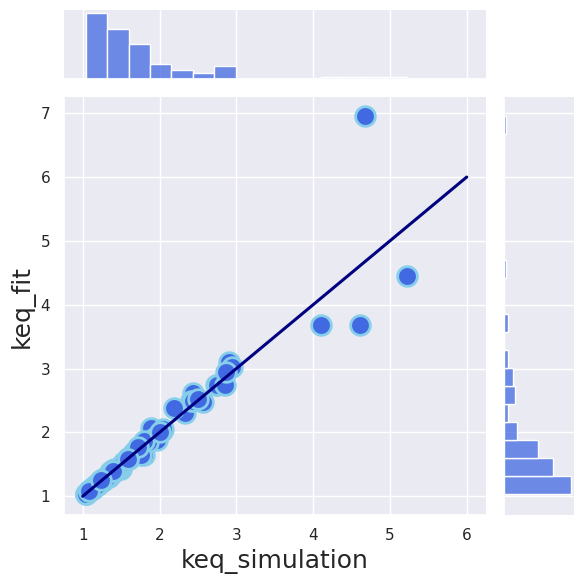

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.0)
sns_plot = sns.jointplot(data=test_dataset,x="y_test",y="decision", kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2) #, xlim=[0.9,2.1], ylim=[0.9,2.1]
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

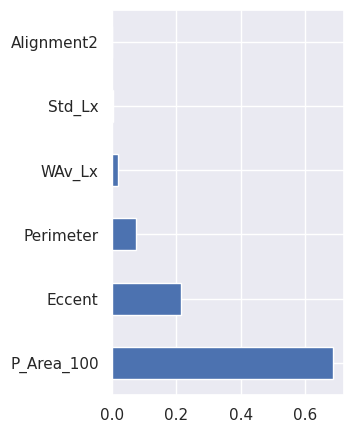

In [ ]:
feat_importances = pd.Series(tuned_hyper_dec_s2.feature_importances_, index=X2_headers)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

XDBoost

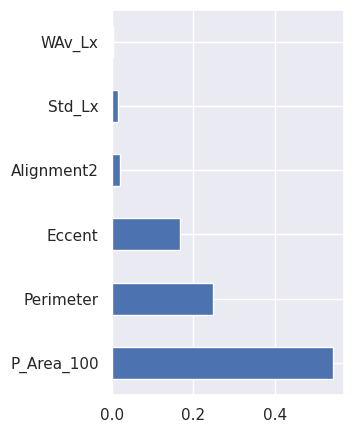

In [ ]:
# Create two subplots and unpack the output array immediately
feat_importances_xgb = pd.Series(tuned_hyper_xgb_s2.feature_importances_, index=X2_headers)
feat_importances_xgb.nlargest(20).plot(kind='barh')
plt.show()

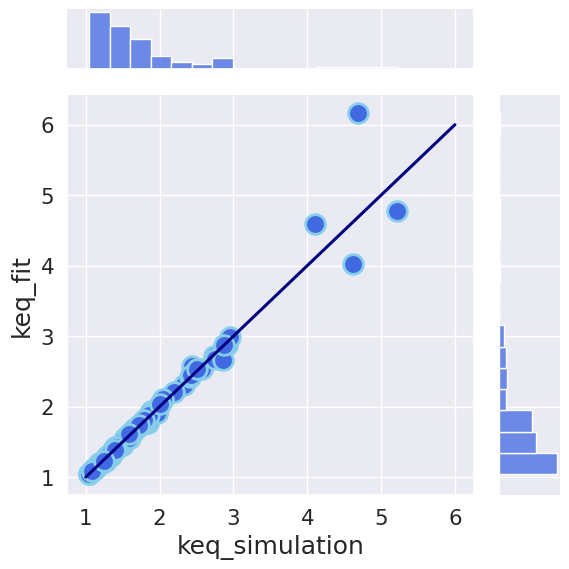

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(data=test_dataset,x="y_test",y="xgboost", kind='scatter' , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)#xlim=[0.9,2.1], ylim=[0.9,2.1]
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

GradientBoosting

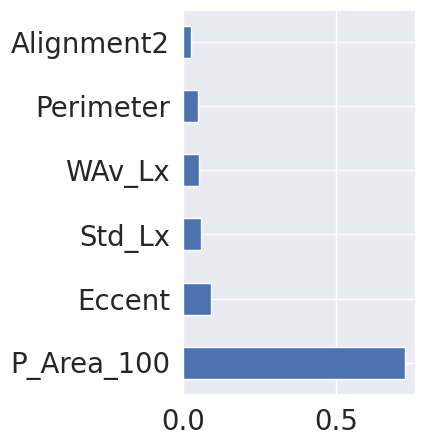

In [ ]:
# Create two subplots and unpack the output array immediately
feat_importances_reg1 = pd.Series(reg1.feature_importances_, index=X2_headers)
feat_importances_reg1.nlargest(20).plot(kind='barh')
plt.show()

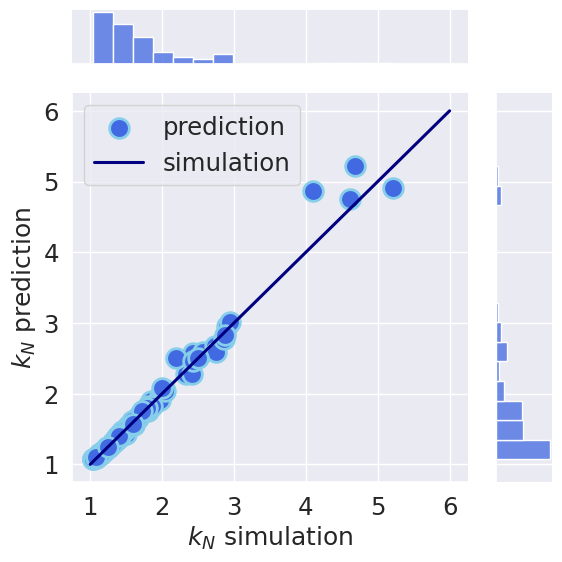

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.6)
sns_plot = sns.jointplot(data=test_dataset,x="y_test",y="gboost", kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('$k_N$ simulation', '$k_N$ prediction', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...
sns_plot.ax_joint.set_yticks([1,2,3,4,5,6])
sns_plot.ax_joint.set_xticks([1,2,3,4,5,6])
#sns_plot.ax_marg_x.set_xlim(0, 0.45)
#sns_plot.ax_marg_y.set_ylim(0.7, 7.3)
plt.legend(labels=["prediction","simulation"])

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

RandomForest

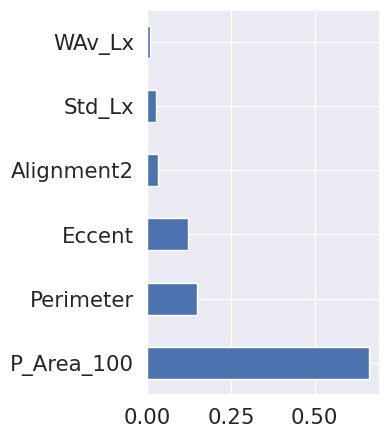

In [ ]:
# Create two subplots and unpack the output array immediately
feat_importances_reg2 = pd.Series(reg2.feature_importances_, index=X2_headers)
feat_importances_reg2.nlargest(20).plot(kind='barh')
plt.show()

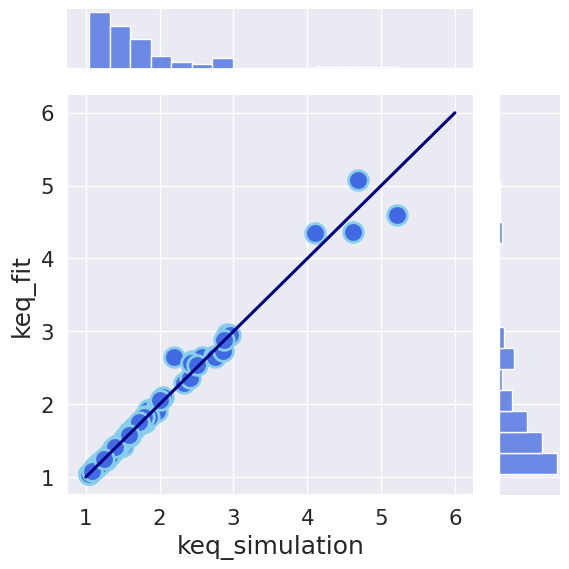

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(data=test_dataset,x="y_test",y="rforest", kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

Linear

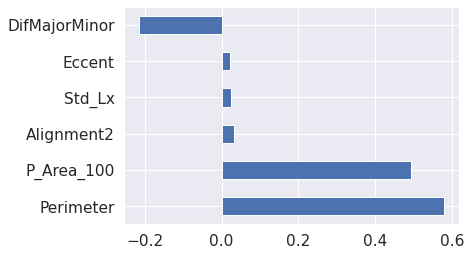

In [ ]:
# Create two subplots and unpack the output array immediately
feat_importances_reg3 = pd.Series(reg3.coef_, index=X2_headers)
feat_importances_reg3.nlargest(20).plot(kind='barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


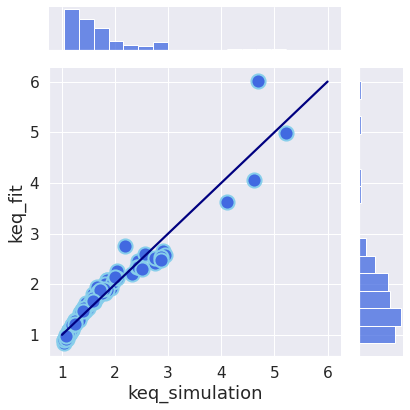

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(y_test, pred3, kind='scatter' , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

## Validation

In [ ]:
validation_properties = pd.read_csv('imagedata_consolidation-round3.txt', sep=',')
validation_properties = validation_properties[(validation_properties.keq_simulation>0) & (validation_properties.Macroporosity<0.41)]
validation_properties.head()

,Macroporosity,Vugs,Count,Sample,Grid,R,P_Area_100,WAv_Lx,Alignment,Alignment2,...,Perimeter,EquivDiameter,Major,Minor,DifMajorMinor,Av_Area,Std_area,var_Area,Std_Lx,var_Lx
0,0.02,35,35,aleatory,grid-10,r1,0.019779,1.90955,0.696032,0.010000,...,0.042460,79.6644,80.0276,79.3678,0.659853,0.056513,19.8897,395.600,0.000250,6.269170e-08
1,0.02,35,32,aleatory,grid-15,r1,0.019639,1.90591,0.426034,0.000262,...,0.046742,84.6397,92.0825,79.7908,12.291800,0.061371,1314.3100,1727410.000,0.000186,3.468790e-08
2,0.02,35,30,aleatory,grid-19,r1,0.019833,2.24164,0.644120,0.172737,...,0.052964,89.2913,108.1190,79.4691,28.649800,0.066110,1919.4800,3684420.000,0.005812,3.377700e-05
3,0.02,35,35,aleatory,grid-20,r1,0.019796,1.91432,0.573051,0.010000,...,0.042565,79.6982,80.0479,79.4153,0.632555,0.056560,21.1202,446.064,0.000284,8.069890e-08
4,0.02,35,35,aleatory,grid-30,r1,0.019776,1.91974,0.520894,0.010000,...,0.042593,79.6569,79.9565,79.4237,0.532712,0.056502,16.9487,287.257,0.000295,8.698720e-08


In [ ]:
# Fixing random state for reproducibility
np.random.seed(154)

#['P_Area_100','WAv_Lx','Alignment2','Eccent','Lx_norm','Perimeter','DifMajorMinor','Std_Lx','var_Lx']
#X2_headers = ['P_Area_100','Alignment2','Eccent','Perimeter','DifMajorMinor','Std_Lx']
#RandomForest
X2_headers = ['P_Area_100','Alignment2','Eccent','Perimeter','WAv_Lx','Std_Lx']

X_val = validation_properties[X2_headers].values
y_val = validation_properties.loc[:,'keq_simulation'].values

X_val = sc.transform(X_val)

X_val.shape

(113, 6)

In [ ]:
# prediction
tuned_extra_validation=tuned_hyper_extra_s2.predict(X_val)

In [ ]:
print(tuned_hyper_xgb_s2.score(X_train,y_train),tuned_hyper_xgb_s2.score(X_test,y_test),tuned_hyper_xgb_s2.score(X_val,y_val))
tuned_xgb_validation = tuned_hyper_xgb_s2.predict(X_val)

0.9999481177677456 0.9467635606876983 0.9625503972395545


In [ ]:
# Train classifiers
GB_validation = reg1.predict(X_val)
RF_validation = reg2.predict(X_val)
linear_validation = reg3.predict(X_val)
voting_validation = ereg.predict(X_val)

In [ ]:
# With hyperparameter tuned

from sklearn import metrics

def goodfit(Y,Ypred):

  absError = Ypred - Y
  MAE = metrics.mean_absolute_error(Y,Ypred)
  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  ErrRel = mean((abs(Y - Ypred))/Y)*100
  ErrRel2 = (sum(abs(Ypred - Y))/sum(Y))*100
  return MAE,MSE,RMSE,Rsquared,ErrRel,ErrRel2

print('Extra\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.2g\n' % (goodfit(y_val, tuned_extra_validation)))
#print('Decision MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\n' % (goodfit(y_test, tuned_dec_s2)))
print('XGBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.2g\n' % (goodfit(y_val, tuned_xgb_validation)))
print('GBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.2g\n' % (goodfit(y_val, GB_validation)))
print('RForest\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.2g\n' % (goodfit(y_val, RF_validation)))
print('Linear\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.2g\n' % (goodfit(y_val, linear_validation)))
print('Voting\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.2g\n' % (goodfit(y_val, voting_validation)))

Extra	 MAE: 0.05538 	 MSE:0.04045 	 RMSE: 0.2011 	 R2: 0.9444 	 Dev: 1.7 	 Dev2: 3.1

XGBoost	 MAE: 0.05053 	 MSE:0.02671 	 RMSE: 0.1634 	 R2: 0.9634 	 Dev: 1.7 	 Dev2: 2.8

GBoost	 MAE: 0.05374 	 MSE:0.02527 	 RMSE: 0.159 	 R2: 0.9655 	 Dev: 1.9 	 Dev2: 3

RForest	 MAE: 0.0543 	 MSE:0.03338 	 RMSE: 0.1827 	 R2: 0.9542 	 Dev: 1.8 	 Dev2: 3

Linear	 MAE: 0.1253 	 MSE:0.0477 	 RMSE: 0.2184 	 R2: 0.9334 	 Dev: 6.5 	 Dev2: 6.9

Voting	 MAE: 0.06185 	 MSE:0.02678 	 RMSE: 0.1637 	 R2: 0.9631 	 Dev: 2.6 	 Dev2: 3.4



In [ ]:
validation_dataset = pd.DataFrame({'y_val': y_val, 'extra': tuned_extra_validation, 'xgboost': tuned_xgb_validation, 'gboost': GB_validation, 'rforest': RF_validation, 'linear': linear_validation, 'voting': voting_validation})

ExtraTrees

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


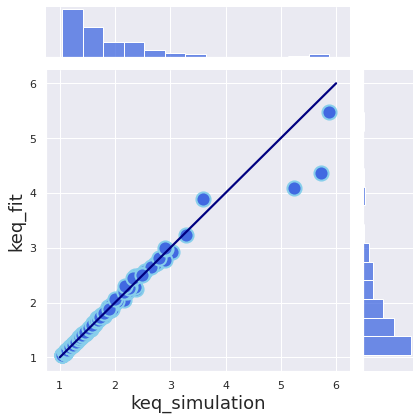

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.0)
sns_plot = sns.jointplot(y_val, tuned_extra_validation, kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2) #xlim=[0.9,2.1], ylim=[0.9,2.1] ,
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

XGBoost

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


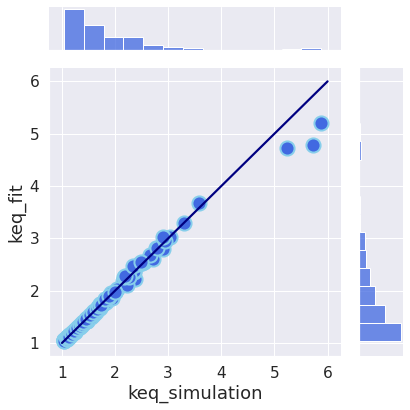

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(y_val, tuned_xgb_validation, kind='scatter' , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)#xlim=[0.9,2.1], ylim=[0.9,2.1]
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

GradientBoosting

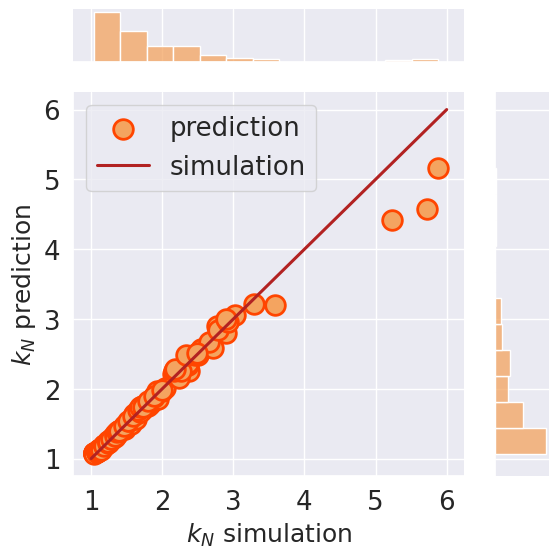

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.7)
sns_plot = sns.jointplot(data=validation_dataset, x="y_val", y="gboost", kind='scatter', s=200, color="sandybrown", edgecolor="orangered", linewidth=2)
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="firebrick", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('$k_N$ simulation', '$k_N$ prediction', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...
sns_plot.ax_joint.set_yticks([1,2,3,4,5,6])
sns_plot.ax_joint.set_xticks([1,2,3,4,5,6])
#sns_plot.ax_marg_x.set_xlim(0, 0.45)
#sns_plot.ax_marg_y.set_ylim(0.7, 7.3)
plt.legend(labels=["prediction","simulation"])

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

RandomForest

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


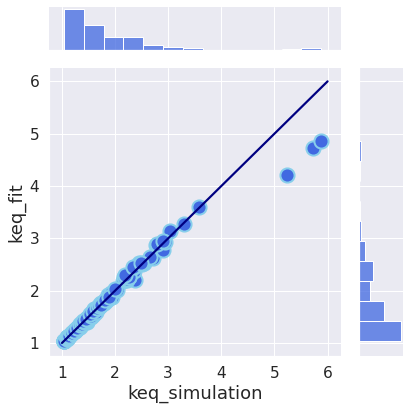

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(y_val, RF_validation, kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

Linear Regressor

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


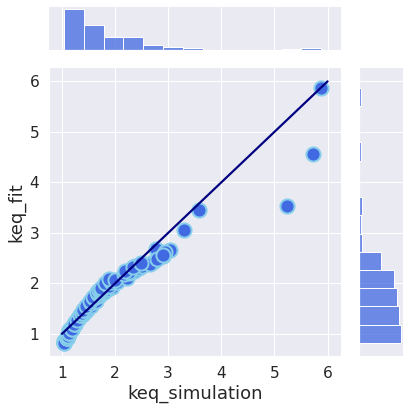

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(y_val, linear_validation, kind='scatter' , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

## Long

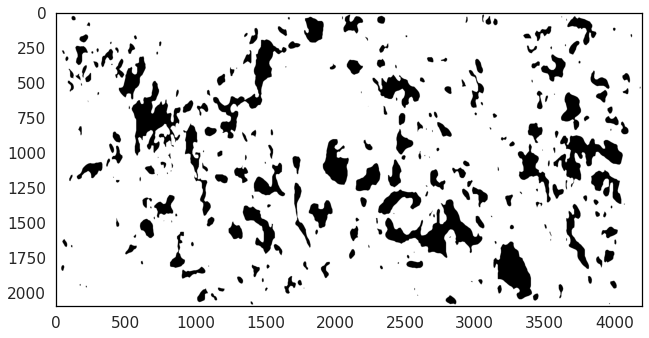

In [ ]:
from IPython.core.pylabtools import figsize
from skimage.io import imread, imshow
from skimage.color import rgb2gray,rgba2rgb
from skimage.filters import gaussian, threshold_otsu
from skimage.morphology import closing
import matplotlib.pyplot as plt

dist = '8'
dir = 'yz'
grid = '430'
P_holes = '2'

# Percentual of holes - macroporosity
output_file_name = 'am0' + dist +'_slice_' + dir + '_' + grid + '_c' + P_holes
z = output_file_name + "_subdomains.png"

image = imread(z)
cropped = image[105:2205,210:4410]

grayscale_crop = rgb2gray(rgba2rgb(cropped))
thresh2 = threshold_otsu(grayscale_crop)
#binary2 = grayscale_crop <= thresh2
bw2 = closing(grayscale_crop > thresh2)

fig, ax = plt.subplots(figsize=[10,5])
ax.imshow(bw2, cmap='gray_r')
ax.xaxis.grid(False, which='major')
ax.yaxis.grid(False, which='major')

plt.tight_layout()
plt.setp(ax.spines.values(), color='black')
#plt.axis('off')
plt.show()


In [ ]:
image.shape

(2310, 4620, 4)

In [ ]:
long_properties = pd.read_csv('imagedata_consolidation_long.csv', sep=',')
long_properties = long_properties[(long_properties.keq_simulation>0) & (long_properties.P_Area_100<0.41)]
long_properties

,Macroporosity,Sample,Count,P_Area_100,WAv_Lx,Alignment,Alignment2,Eccent,keq_simulation,WAv_ly,...,Perimeter,EquivDiameter,Major,Minor,DifMajorMinor,Av_Area,Std_area,var_Area,Std_Lx,var_Lx
0,1,5,396,0.013777,1.17196,0.587639,0.158397,0.823813,1.02,0.877901,...,0.021532,10.0803,16.9743,7.46936,9.50493,0.003479,44.9587,2021.28,0.004988,0.000025
1,1,8,281,0.020561,1.70856,0.601714,0.264706,0.808948,1.06,1.417340,...,0.037674,15.7303,24.3931,12.62960,11.76350,0.007317,104.5230,10925.10,0.006431,0.000041
2,2,5,711,0.039013,2.36268,0.594161,0.301631,0.820418,1.00,1.545600,...,0.051674,19.1623,32.0990,14.57010,17.52890,0.005487,146.8720,21571.30,0.006350,0.000040
3,2,8,407,0.037880,2.61782,0.587499,0.364057,0.805317,1.06,2.192600,...,0.076176,22.9705,39.0354,20.97080,18.06460,0.009307,204.7190,41909.90,0.008015,0.000064
4,3,5,543,0.024858,1.47985,0.564029,0.215443,0.823534,1.02,1.075040,...,0.030483,12.1954,20.7200,9.23295,11.48700,0.004578,66.4345,4413.54,0.005590,0.000031
5,3,8,363,0.031119,2.02105,0.575036,0.324599,0.798356,1.08,1.657570,...,0.047298,18.1088,28.5369,15.20870,13.32820,0.008573,132.7250,17615.90,0.007337,0.000054
6,4,5,1197,0.120719,3.38180,0.608433,0.426698,0.844986,1.47,2.082710,...,0.079483,23.0218,50.3499,17.11390,33.23600,0.010085,211.6320,44788.00,0.010694,0.000114
7,4,8,739,0.122621,4.35282,0.515778,0.394668,0.810457,1.47,4.339910,...,0.144756,37.8193,64.5590,32.79610,31.76290,0.016593,459.0200,210699.00,0.011823,0.000140
8,5,5,514,0.359520,33.64120,0.750843,0.723871,0.886932,6.43,16.596000,...,1.598450,156.5740,424.3100,153.72500,270.58500,0.069946,3845.5900,14800000.00,0.048453,0.002348
9,5,8,512,0.371736,39.75020,0.821599,0.798077,0.861196,7.42,18.784800,...,2.493570,195.2890,490.5910,212.64500,277.94600,0.072605,4937.4400,24400000.00,0.049682,0.002468


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


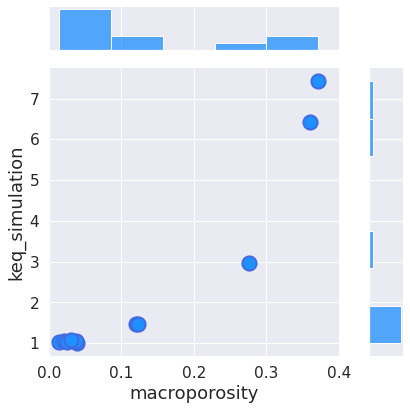

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(long_properties.P_Area_100,long_properties.keq_simulation, xlim=[0.0,0.40] ,kind='scatter', s=200, color="dodgerblue", edgecolor="royalblue", linewidth=2) #
#sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('macroporosity', 'keq_simulation', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

In [ ]:
# Fixing random state for reproducibility
np.random.seed(154)

#['P_Area_100','WAv_Lx','Alignment2','Eccent','Lx_norm','Perimeter','DifMajorMinor','Std_Lx','var_Lx']
X2_headers = ['P_Area_100','Alignment2','Eccent','Perimeter','DifMajorMinor','Std_Lx']

X_long = long_properties[X2_headers].values
y_long = long_properties.loc[:,'keq_simulation'].values

X_long = sc.transform(X_long)

X_long.shape

(11, 6)

In [ ]:
# prediction
tuned_extra_long=tuned_hyper_extra_s2.predict(X_long)

In [ ]:
print(tuned_hyper_xgb_s2.score(X_train,y_train),tuned_hyper_xgb_s2.score(X_test,y_test),tuned_hyper_xgb_s2.score(X_val,y_val))
tuned_xgb_long = tuned_hyper_xgb_s2.predict(X_long)

0.9983668749542823 0.9818722768317739 0.9780500986236809


In [ ]:
# Train classifiers
GB_long = reg1.predict(X_long)
RF_long = reg2.predict(X_long)
linear_long = reg3.predict(X_long)
voting_long = ereg.predict(X_long)

In [ ]:
# With hyperparameter tuned

from sklearn import metrics

def goodfit(Y,Ypred):

  absError = Ypred - Y
  MAE = metrics.mean_absolute_error(Y,Ypred)
  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  ErrRel = mean((abs(Y - Ypred))/Y)*100
  ErrRel2 = (sum(abs(Ypred - Y))/sum(Y))*100
  return MAE,MSE,RMSE,Rsquared,ErrRel,ErrRel2


print('Extra\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, tuned_extra_long)))
#print('Decision MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\n' % (goodfit(y_test, tuned_dec_s2)))
print('XGBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, tuned_xgb_long)))
print('GBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, GB_long)))
print('RForest\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, RF_long)))
print('Linear\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, linear_long)))
print('Voting\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, voting_long)))


Extra	 MAE: 0.4265 	 MSE:0.3865 	 RMSE: 0.6217 	 R2: 0.9253 	 Dev: 19 	 Dev2: 18

XGBoost	 MAE: 0.3408 	 MSE:0.229 	 RMSE: 0.4786 	 R2: 0.9559 	 Dev: 15 	 Dev2: 14.4

GBoost	 MAE: 0.3618 	 MSE:0.3601 	 RMSE: 0.6001 	 R2: 0.9339 	 Dev: 13 	 Dev2: 15.3

RForest	 MAE: 0.3725 	 MSE:0.4364 	 RMSE: 0.6606 	 R2: 0.9247 	 Dev: 12 	 Dev2: 15.8

Linear	 MAE: 0.3434 	 MSE:0.5078 	 RMSE: 0.7126 	 R2: 0.91 	 Dev: 11 	 Dev2: 14.5

Voting	 MAE: 0.1436 	 MSE:0.05237 	 RMSE: 0.2289 	 R2: 0.9902 	 Dev: 5.5 	 Dev2: 6.08



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


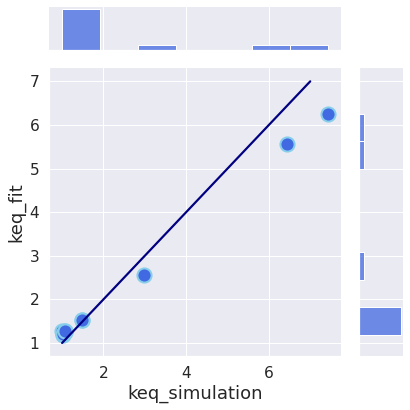

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(y_long, tuned_xgb_long, kind='scatter' , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,7.0], [1,7.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

## Long 2

In [ ]:
long_properties2 = pd.read_csv('imagedata_consolidation_long-t1e2.csv', sep=',')
long_properties2 = long_properties2[(long_properties2.keq_simulation>0) & (long_properties2.P_Area_100<0.41)]
long_properties2.keq_simulation

0     1.02000
1     1.06000
2     1.00000
3     1.06000
4     1.02000
5     1.08000
6     1.47000
7     1.47000
8     6.43000
9     7.42000
11    2.97000
12    1.29765
13    1.39255
14    1.16991
15    1.32490
16    1.56609
18    1.18536
19    1.26488
20    1.26938
21    1.39079
22    1.62525
23    1.67187
24    1.31321
25    1.09879
26    1.34202
27    1.06747
28    1.05844
29    1.09622
30    1.05557
31    1.08430
32    1.36410
33    1.07854
34    1.11130
35    1.42654
Name: keq_simulation, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


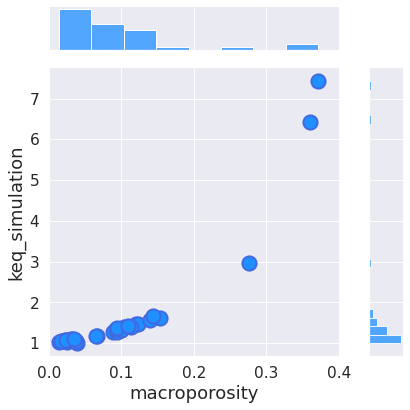

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(long_properties2.P_Area_100,long_properties2.keq_simulation, xlim=[0.0,0.40] ,kind='scatter', s=200, color="dodgerblue", edgecolor="royalblue", linewidth=2) #
#sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('macroporosity', 'keq_simulation', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

In [ ]:
# Fixing random state for reproducibility
np.random.seed(154)

#['P_Area_100','WAv_Lx','Alignment2','Eccent','Lx_norm','Perimeter','DifMajorMinor','Std_Lx','var_Lx']
X2_headers = ['P_Area_100','Alignment2','Eccent','Perimeter','DifMajorMinor','Std_Lx']

X_long = long_properties2[X2_headers].values
y_long = long_properties2.loc[:,'keq_simulation'].values

X_long = sc.transform(X_long)

X_long.shape

(34, 6)

In [ ]:
# prediction
tuned_extra_long=tuned_hyper_extra_s2.predict(X_long)

In [ ]:
print(tuned_hyper_xgb_s2.score(X_train,y_train),tuned_hyper_xgb_s2.score(X_test,y_test),tuned_hyper_xgb_s2.score(X_val,y_val))
tuned_xgb_long = tuned_hyper_xgb_s2.predict(X_long)

0.9983668749542823 0.9818722768317739 0.9780500986236809


In [ ]:
# Train classifiers
GB_long = reg1.predict(X_long)
RF_long = reg2.predict(X_long)
linear_long = reg3.predict(X_long)
voting_long = ereg.predict(X_long)

In [ ]:
# With hyperparameter tuned

from sklearn import metrics

def goodfit(Y,Ypred):

  absError = Ypred - Y
  MAE = metrics.mean_absolute_error(Y,Ypred)
  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  ErrRel = mean((abs(Y - Ypred))/Y)*100
  ErrRel2 = (sum(abs(Ypred - Y))/sum(Y))*100

  return MAE,MSE,RMSE,Rsquared,ErrRel,ErrRel2

print('Extra\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, tuned_extra_long)))
#print('Decision MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\n' % (goodfit(y_test, tuned_dec_s2)))
print('XGBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, tuned_xgb_long)))
print('GBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, GB_long)))
print('RForest\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, RF_long)))
print('Linear\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, linear_long)))
print('Voting\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_long, voting_long)))

Extra	 MAE: 0.2363 	 MSE:0.1432 	 RMSE: 0.3784 	 R2: 0.9257	 Dev: 14 	 Dev2: 14.5

XGBoost	 MAE: 0.1821 	 MSE:0.08407 	 RMSE: 0.29 	 R2: 0.9559	 Dev: 11 	 Dev2: 11.2

GBoost	 MAE: 0.1718 	 MSE:0.1231 	 RMSE: 0.3508 	 R2: 0.9354	 Dev: 8.4 	 Dev2: 10.6

RForest	 MAE: 0.1685 	 MSE:0.1468 	 RMSE: 0.3831 	 R2: 0.9247	 Dev: 7.5 	 Dev2: 10.4

Linear	 MAE: 0.3208 	 MSE:0.2927 	 RMSE: 0.541 	 R2: 0.8699	 Dev: 20 	 Dev2: 19.7

Voting	 MAE: 0.1121 	 MSE:0.03664 	 RMSE: 0.1914 	 R2: 0.9814	 Dev: 6.8 	 Dev2: 6.9



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


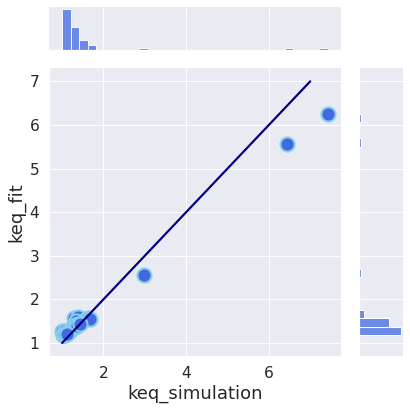

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(y_long, tuned_xgb_long, kind='scatter' , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,7.0], [1,7.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

## Devices

In [ ]:
os.chdir("..")

In [ ]:
os.getcwd()

'/content/drive'

In [ ]:
os.chdir("drive/My Drive/Petrobras - Meio Fraturado/UPython/Artificiais/Jesus/geometries/Data/")

In [ ]:
#summary_properties = pd.read_csv('data_summary.txt', sep=',')
device_properties = pd.read_csv('imagedata_consolidation-devices.txt', sep=',')
#summary_properties = summary_properties[(summary_properties.keq_simulation>0) & (summary_properties.Macroporosity<0.41)]
device_properties = device_properties[['Sample','Count','P_Area_100','WAv_Lx','Alignment','Alignment2','Eccent','WAv_ly','Lx_norm','Ly_norm','Perimeter','EquivDiameter','Major','Minor','DifMajorMinor','Av_Area','Std_area','var_Area','Std_Lx','var_Lx','keq_simulation']]
device_properties

,Sample,Count,P_Area_100,WAv_Lx,Alignment,Alignment2,Eccent,WAv_ly,Lx_norm,Ly_norm,...,EquivDiameter,Major,Minor,DifMajorMinor,Av_Area,Std_area,var_Area,Std_Lx,var_Lx,keq_simulation
0,T1,10,0.083137,5.16984,1,1,0.787943,3.17829,0.051698,0.160943,...,584.080,762.379,468.691,293.68800,0.831370,8067.79,65089200.0,0.001560,0.000002,1.21920
1,T2,9,0.126400,12.74650,1,1,0.985437,2.16745,0.127465,0.110183,...,757.976,1881.010,319.850,1561.16000,1.404440,0.00,0.0,0.000000,0.000000,1.92845
2,T3,15,0.124812,5.17184,1,1,0.788624,3.17634,0.051718,0.160983,...,584.533,763.331,468.807,294.52400,0.832079,6813.87,46428800.0,0.001313,0.000002,1.39213
3,M1,20,0.114822,3.78558,1,1,0.101274,3.80515,0.037856,0.151657,...,437.810,449.177,446.868,2.30941,0.574110,0.00,0.0,0.000000,0.000000,1.24600
4,M2,8,0.113676,9.38264,1,1,0.914500,3.79611,0.093826,0.151444,...,688.304,1107.360,448.022,659.33500,1.420950,0.00,0.0,0.000000,0.000000,1.42000
5,M3,10,0.116479,15.25140,1,1,0.992034,1.91762,0.152514,0.076473,...,623.605,1800.000,226.318,1573.68000,1.164790,11652.40,135778000.0,0.005817,0.000034,2.07000
6,M4,80,0.118834,1.91537,1,1,0.172986,1.94469,0.019154,0.077553,...,222.848,229.783,226.318,3.46415,0.148542,0.00,0.0,0.000000,0.000000,1.22700


In [ ]:
def testpython_func(df):

  X = df.loc[:,"P_Area_100"]
  Y = df.loc[:,"keq_simulation"]
  phi_m = df.loc[:,"P_Area_100"]
  lx = df.loc[:,"WAv_Lx"]
  orient = df.loc[:,"Alignment"]
  ecc = df.loc[:,"Eccent"]
  keq_fit = 1 + (7.0284*(df['P_Area_100']**1.6597)*(df['WAv_Lx']**0.4687)*(df['Alignment2']**0.3934)*(df['Eccent']**0.0809))
  return X,Y,keq_fit

Xtrain,Ytrain,Ypredtrain = testpython_func(device_properties)

In [ ]:
def ErrRel(Y, Ypred):
  return mean((abs(Y - Ypred))/Y)*100

def ErrRel2(Y, Ypred):
  return (sum(abs(Ypred - Y))/sum(Y))*100

def goodfit(Y,Ypred):
  absError = Ypred - Y

  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  print("RMSE: %2.5f \t R-squared: %2.5f \t Dev: %2.2f \t Dev2: %2.2f \n" % (RMSE,Rsquared,ErrRel(Y,Ypred),ErrRel2(Y,Ypred)))
  return

#print("Test-Matlab\t")
#goodfit(Ytest,Ypredtest)
print("Test-Python\t")
goodfit(Ytrain,Ypredtrain)

Test-Python	
RMSE: 0.19165 	 R-squared: 0.75025 	 Dev: 10.52 	 Dev2: 10.90 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


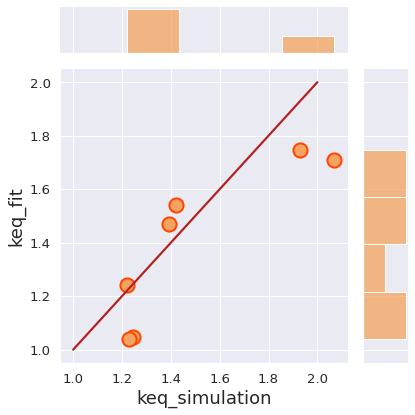

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.2)
sns_plot = sns.jointplot(Ytrain,Ypredtrain, kind='scatter', s=200, color="sandybrown", edgecolor="orangered", linewidth=2) #xlim=[0.9,2.1], ylim=[0.9,2.1] ,
sns_plot.ax_joint.plot([1,2.0], [1,2.0], color="firebrick", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
# sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

In [ ]:
ErrRel_device = (abs(Ytrain - Ypredtrain)/Ytrain)*100
pd.DataFrame({'Sample': device_properties.loc[:,"Sample"],'Macroporosity':Xtrain,'Simulation':Ytrain,'Prediction':Ypredtrain, 'Deviation':ErrRel_device})

,Sample,Macroporosity,Simulation,Prediction,Deviation
0,T1,0.083137,1.21920,1.239923,1.699740
1,T2,0.126400,1.92845,1.747493,9.383522
2,T3,0.124812,1.39213,1.471037,5.668103
3,M1,0.114822,1.24600,1.049034,15.807881
4,M2,0.113676,1.42000,1.539683,8.428356
5,M3,0.116479,2.07000,1.710303,17.376645
6,M4,0.118834,1.22700,1.039390,15.290164


In [ ]:
# Fixing random state for reproducibility
np.random.seed(154)

#['P_Area_100','WAv_Lx','Alignment2','Eccent','Lx_norm','Perimeter','DifMajorMinor','Std_Lx','var_Lx']
#X2_headers = ['P_Area_100','Alignment2','Eccent','Perimeter','DifMajorMinor','Std_Lx']
#RandomForest
X2_headers = ['P_Area_100','Alignment2','Eccent','Perimeter','WAv_Lx','Std_Lx']

X_dev = device_properties[X2_headers].values
y_dev = device_properties.loc[:,'keq_simulation'].values

X_dev = sc.transform(X_dev)

X_dev.shape

(7, 6)

In [ ]:
GB_dev = reg1.predict(X_dev)
RF_dev = reg2.predict(X_dev)

In [ ]:
print(reg1.score(X_dev,GB_dev))

1.0


In [ ]:
device_pred = pd.DataFrame({'y_dev': y_dev, 'gboost': GB_dev, 'rforest': RF_dev})

In [ ]:
# With hyperparameter tuned

from sklearn import metrics

def goodfit(Y,Ypred):

  absError = Ypred - Y
  MAE = metrics.mean_absolute_error(Y,Ypred)
  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  ErrRel = mean((abs(Y - Ypred))/Y)*100
  ErrRel2 = (sum(abs(Ypred - Y))/sum(Y))*100
  return MAE,MSE,RMSE,Rsquared,ErrRel,ErrRel2

print('GBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.2g\n' % (goodfit(y_dev, GB_dev)))
print('RForest\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g \t Dev: %.2g \t Dev2: %.2g\n' % (goodfit(y_dev, RF_dev)))


GBoost	 MAE: 0.2143 	 MSE:0.06936 	 RMSE: 0.2634 	 R2: 0.3573 	 Dev: 13 	 Dev2: 14

RForest	 MAE: 0.1991 	 MSE:0.09422 	 RMSE: 0.307 	 R2: 0.2685 	 Dev: 11 	 Dev2: 13



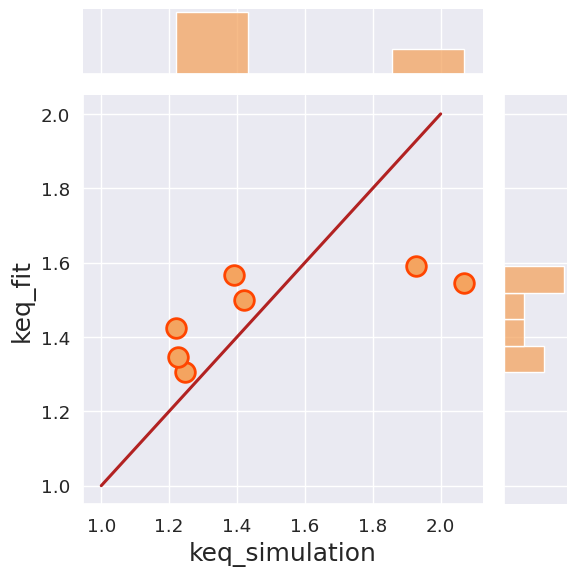

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.2)
sns_plot = sns.jointplot(data=device_pred,x="y_dev",y="gboost", kind='scatter', s=200, color="sandybrown", edgecolor="orangered", linewidth=2) #xlim=[0.9,2.1], ylim=[0.9,2.1] ,
sns_plot.ax_joint.plot([1,2.0], [1,2.0], color="firebrick", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
# sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

## Device-Ellipses

Path

In [ ]:
#os.chdir("drive/My Drive/Petrobras - Meio Fraturado/UPython/Artificiais/Jesus/geometries/Data/")
os.chdir("Petrobras - Meio Fraturado/UPython/Artificiais/Jesus/geometries/")

In [ ]:
os.chdir("..")

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Petrobras - Meio Fraturado/UPython/Artificiais/Jesus/geometries'

Load images created with ellipses

In [ ]:
from skimage.io import imread, imshow

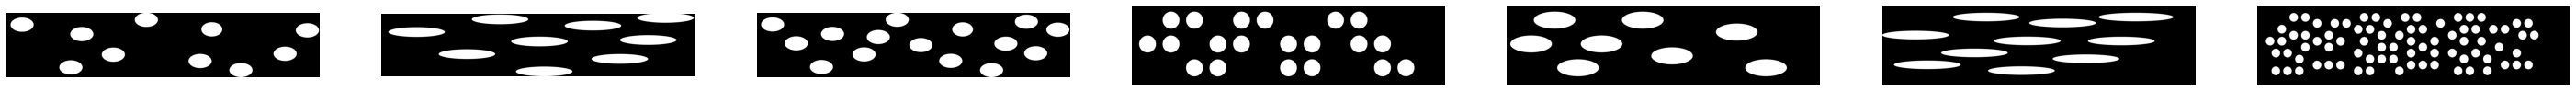

In [ ]:
sample = ['T1','T2','T3','M1','M2','M3','M4']
fig, ax = plt.subplots(1,7,figsize=[50,50])
for ind_i in range(len(sample)):

  # File name
  output_file_name = sample[ind_i]
  z = output_file_name + "_ellipse.png"
  image = imread(z)
  ax[ind_i].imshow(image, cmap=plt.cm.gray)
  ax[ind_i].axis('off')

Load Ellipses Data

In [ ]:
#summary_properties = pd.read_csv('data_summary.txt', sep=',')
device_properties = pd.read_csv('Data/imagedata_consolidation-devices-ellipses.txt', sep=',')
#summary_properties = summary_properties[(summary_properties.keq_simulation>0) & (summary_properties.Macroporosity<0.41)]
device_properties = device_properties[['Sample','Count','P_Area_100','WAv_Lx','Alignment','Alignment2','Eccent','WAv_ly','Lx_norm','Ly_norm','Perimeter','EquivDiameter','Major','Minor','DifMajorMinor','Av_Area','Std_area','var_Area','Std_Lx','var_Lx','keq_simulation']]
device_properties

,Sample,Count,P_Area_100,WAv_Lx,Alignment,Alignment2,Eccent,WAv_ly,Lx_norm,Ly_norm,...,EquivDiameter,Major,Minor,DifMajorMinor,Av_Area,Std_area,var_Area,Std_Lx,var_Lx,keq_simulation
0,T1,10,0.126992,7.32486,0.999900,0.999900,0.787234,4.50890,0.073249,0.221087,...,160.2640,204.2720,125.7630,78.508500,1.269920,606.09100,3.673460e+05,0.002169,4.704750e-06,1.21920
1,T2,9,0.195669,18.03270,0.999983,0.999983,0.985292,3.08643,0.180327,0.153770,...,207.9650,503.0980,85.9679,417.130000,2.174100,29.88080,8.928610e+02,0.000119,1.427410e-08,1.92845
2,T3,15,0.189294,7.31388,0.999781,0.999781,0.787539,4.51132,0.073139,0.219661,...,160.3080,204.3420,125.7820,78.559300,1.261960,512.28000,2.624310e+05,0.001884,3.550580e-06,1.39213
3,M1,20,0.181508,5.36918,0.014752,0.010000,0.110352,5.39248,0.053692,0.214929,...,150.2240,150.6860,149.7630,0.923286,0.907540,6.83547,4.672370e+01,0.000147,2.163650e-08,1.24600
4,M2,8,0.179470,13.27060,0.999932,0.999932,0.914011,5.38979,0.132706,0.215129,...,236.0190,370.5520,150.3290,220.223000,2.243370,12.38660,1.534290e+02,0.000166,2.752860e-08,1.42000
5,M3,11,0.184328,21.57660,0.999984,0.999984,0.991949,2.72399,0.215766,0.108726,...,214.0400,602.1550,76.1086,526.047000,1.675710,10915.20000,1.191420e+08,0.065338,4.268990e-03,2.07000
6,M4,80,0.188772,2.71417,0.012976,0.010000,0.178407,2.76523,0.027142,0.110372,...,76.5456,77.1691,75.9268,1.242290,0.235966,4.78070,2.285510e+01,0.000161,2.593730e-08,1.22700


Geometric estimation

In [ ]:
def testpython_func(df):

  X = df.loc[:,"P_Area_100"]
  Y = df.loc[:,"keq_simulation"]
  phi_m = df.loc[:,"P_Area_100"]
  lx = df.loc[:,"WAv_Lx"]
  orient = df.loc[:,"Alignment"]
  ecc = df.loc[:,"Eccent"]
  keq_fit = 1 + (7.0284*(df['P_Area_100']**1.6597)*(df['WAv_Lx']**0.4687)*(df['Alignment2']**0.3934)*(df['Eccent']**0.0809))
  return X,Y,keq_fit

Xtrain,Ytrain,Ypredtrain = testpython_func(device_properties)

In [ ]:
def ErrRel(Y, Ypred):
  return mean((abs(Y - Ypred))/Y)*100

def ErrRel2(Y, Ypred):
  return (sum(abs(Ypred - Y))/sum(Y))*100

def goodfit(Y,Ypred):
  absError = Ypred - Y

  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  print("RMSE: %2.5f \t R-squared: %2.5f \t Dev: %2.2f \t Dev2: %2.2f \n" % (RMSE,Rsquared,ErrRel(Y,Ypred),ErrRel2(Y,Ypred)))
  return

#print("Test-Matlab\t")
#goodfit(Ytest,Ypredtest)
print("Test-Python\t")
goodfit(Ytrain,Ypredtrain)

Test-Python	
RMSE: 0.63745 	 R-squared: -0.65517 	 Dev: 35.26 	 Dev2: 36.72 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


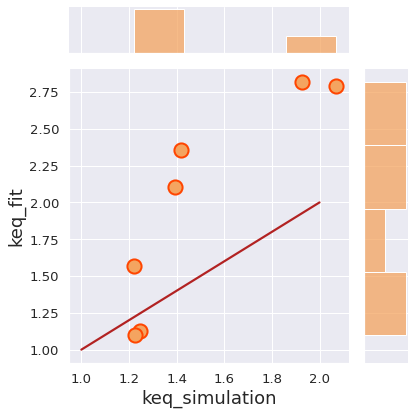

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.2)
sns_plot = sns.jointplot(Ytrain,Ypredtrain, kind='scatter', s=200, color="sandybrown", edgecolor="orangered", linewidth=2) #xlim=[0.9,2.1], ylim=[0.9,2.1] ,
sns_plot.ax_joint.plot([1,2.0], [1,2.0], color="firebrick", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
# sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

In [ ]:
ErrRel_device = (abs(Ytrain - Ypredtrain)/Ytrain)*100
pd.DataFrame({'Sample': device_properties.loc[:,"Sample"],'Macroporosity':Xtrain,'Simulation':Ytrain,'Prediction':Ypredtrain, 'Deviation':ErrRel_device})

,Sample,Macroporosity,Simulation,Prediction,Deviation
0,T1,0.126992,1.21920,1.570563,28.819107
1,T2,0.195669,1.92845,2.816301,46.039602
2,T3,0.189294,1.39213,2.105904,51.272106
3,M1,0.181508,1.24600,1.124370,9.761662
4,M2,0.179470,1.42000,2.354674,65.822140
5,M3,0.184328,2.07000,2.790233,34.793845
6,M4,0.188772,1.22700,1.100234,10.331379


## ML Devices

Testing Machine Learning

In [ ]:
device_properties

,Sample,Count,P_Area_100,WAv_Lx,Alignment,Alignment2,Eccent,WAv_ly,Lx_norm,Ly_norm,...,EquivDiameter,Major,Minor,DifMajorMinor,Av_Area,Std_area,var_Area,Std_Lx,var_Lx,keq_simulation
0,T1,10,0.083137,5.16984,1,1.00,0.787943,3.17829,0.051698,0.160943,...,584.080,762.379,468.691,293.68800,0.831370,8067.79,65089200.0,0.001560,0.000002,1.21920
1,T2,9,0.126400,12.74650,1,1.00,0.985437,2.16745,0.127465,0.110183,...,757.976,1881.010,319.850,1561.16000,1.404440,0.00,0.0,0.000000,0.000000,1.92845
2,T3,15,0.124812,5.17184,1,1.00,0.788624,3.17634,0.051718,0.160983,...,584.533,763.331,468.807,294.52400,0.832079,6813.87,46428800.0,0.001313,0.000002,1.39213
3,M1,20,0.114822,3.78558,0,0.01,0.101274,3.80515,0.037856,0.151657,...,437.810,449.177,446.868,2.30941,0.574110,0.00,0.0,0.000000,0.000000,1.24600
4,M2,8,0.113676,9.38264,1,1.00,0.914500,3.79611,0.093826,0.151444,...,688.304,1107.360,448.022,659.33500,1.420950,0.00,0.0,0.000000,0.000000,1.42000
5,M3,10,0.116479,15.25140,1,1.00,0.992034,1.91762,0.152514,0.076473,...,623.605,1800.000,226.318,1573.68000,1.164790,11652.40,135778000.0,0.005817,0.000034,2.07000
6,M4,80,0.118834,1.91537,0,0.01,0.172986,1.94469,0.019154,0.077553,...,222.848,229.783,226.318,3.46415,0.148542,0.00,0.0,0.000000,0.000000,1.22700


In [ ]:
# Transform device data
# Fixing random state for reproducibility
np.random.seed(154)

#['P_Area_100','WAv_Lx','Alignment2','Eccent','Lx_norm','Perimeter','DifMajorMinor','Std_Lx','var_Lx']
X2_headers = ['P_Area_100','Alignment2','Eccent','Perimeter','DifMajorMinor','Std_Lx']

X_device = device_properties[X2_headers].values
y_device = device_properties.loc[:,'keq_simulation'].values

X_device = sc.transform(X_device)

X_device.shape

(7, 6)

In [ ]:
# Prediction
tuned_extra_device=tuned_hyper_extra_s2.predict(X_device)
tuned_xgb_device = tuned_hyper_xgb_s2.predict(X_device)

In [ ]:
# Train classifiers
GB_device = reg1.predict(X_device)
RF_device = reg2.predict(X_device)
linear_device = reg3.predict(X_device)
voting_device = ereg.predict(X_device)

In [ ]:
# With hyperparameter tuned

from sklearn import metrics

def goodfit(Y,Ypred):

  absError = Ypred - Y
  MAE = metrics.mean_absolute_error(Y,Ypred)
  SE = np.square(absError) # squared errors
  MSE = np.mean(SE) # mean squared errors
  RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
  Rsquared = 1.0 - (np.var(absError) / np.var(Y))
  ErrRel = mean((abs(Y - Ypred))/Y)*100
  ErrRel2 = (sum(abs(Ypred - Y))/sum(Y))*100

  return MAE,MSE,RMSE,Rsquared,ErrRel,ErrRel2

print('Extra\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_device, tuned_extra_device)))
#print('Decision MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\n' % (goodfit(y_test, tuned_dec_s2)))
print('XGBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_device, tuned_xgb_device)))
print('GBoost\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_device, GB_device)))
print('RForest\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_device, RF_device)))
print('Linear\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_device, linear_device)))
print('Voting\t MAE: %.4g \t MSE:%.4g \t RMSE: %.4g \t R2: %.4g\t Dev: %.2g \t Dev2: %.3g\n' % (goodfit(y_device, voting_device)))

Extra	 MAE: 0.2179 	 MSE:0.08054 	 RMSE: 0.2838 	 R2: 0.5261	 Dev: 16 	 Dev2: 14.5

XGBoost	 MAE: 0.2511 	 MSE:0.09216 	 RMSE: 0.3036 	 R2: 0.3225	 Dev: 18 	 Dev2: 16.7

GBoost	 MAE: 0.1979 	 MSE:0.0637 	 RMSE: 0.2524 	 R2: 0.4156	 Dev: 12 	 Dev2: 13.2

RForest	 MAE: 0.2029 	 MSE:0.1029 	 RMSE: 0.3207 	 R2: 0.2336	 Dev: 11 	 Dev2: 13.5

Linear	 MAE: 1.442 	 MSE:4.75 	 RMSE: 2.179 	 R2: -26.89	 Dev: 80 	 Dev2: 96.1

Voting	 MAE: 0.56 	 MSE:0.811 	 RMSE: 0.9005 	 R2: -4.208	 Dev: 30 	 Dev2: 37.3



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


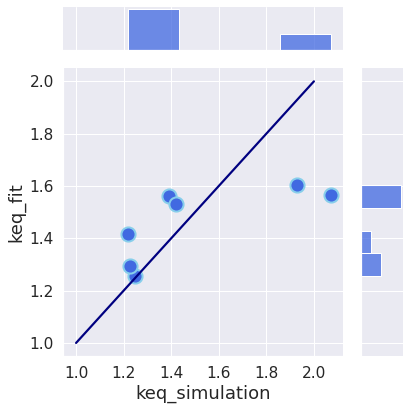

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(y_device, GB_device, kind='scatter' , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,2.0], [1,2.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout()

## Draft

In [ ]:

fig = plot_cv_results(grid_result.estimators_[1].cv_results_, 'n_estimators', 'max_depth')

# # fitting
# multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train, y_train)
# # Fit a model and predict the lens values from the original features
# model = xgb.XGBRegressor(n_estimators=2000, max_depth=20, learning_rate=0.01,objective='reg:squarederror')
# ,n_estimators=400
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(objective='reg:squarederror',gamma=0,min_child_weight=1),
            param_grid={"learning_rate": (0.1, 0.05, 0.
xgbr = xgb.XGBRegressor(verbosity=0)

start_time = time_ns()
# fitting
# multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train, y_train)
# Fit a model and predict the lens values from the original features
model = xgb.XGBRegressor(n_estimators=2000, max_depth=10, learning_rate=0.01,objective='reg:squarederror')
model_external = MultiOutputRegressor(model)
model_external.fit(X_train, y_train)
final_time=time_ns()
delta=final_time-start_time
print(

In [ ]:
data = {"Models":  [("MAE","MSE","RMSE","R2")],
        "ExtraTrees": [goodfit(y_val, tuned_extra_validation)],
        "XDBoosting": [goodfit(y_val, tuned_xgb_validation)],
        "GradientBoostingRegressor": [goodfit(y_val, GB_validation)],
        "RandomForestRegressor": [goodfit(y_val, linear_validation)],
        "VotingRegressor":[goodfit(y_val, voting_validation)],
        "LinearRegression":[goodfit(y_val, linear_validation)]
        }
data

{'ExtraTrees': [(0.050338974336283544,
   0.03155497177757545,
   0.17763719142560053,
   0.956593947931181)],
 'GradientBoostingRegressor': [(0.053290551915966135,
   0.028273722197202984,
   0.16814791761185444,
   0.961273982997209)],
 'LinearRegression': [(0.06466172369316063,
   0.02947065962354184,
   0.17167020598677524,
   0.9606316888584759)],
 'Models': [('MAE', 'MSE', 'RMSE', 'R2')],
 'RandomForestRegressor': [(0.06466172369316063,
   0.02947065962354184,
   0.17167020598677524,
   0.9606316888584759)],
 'VotingRegressor': [(0.12472938543461858,
   0.05397564280952576,
   0.23232658653181681,
   0.929588856485493)],
 'XDBoosting': [(0.04329796772475791,
   0.01565274542467002,
   0.12511093247462438,
   0.9786576867163326)]}

In [ ]:
import pandas as pd
pd.DataFrame(data)

,Models,ExtraTrees,XDBoosting,GradientBoostingRegressor,RandomForestRegressor,VotingRegressor,LinearRegression
0,"(MAE, MSE, RMSE, R2)","(0.050338974336283544, 0.03155497177757545, 0....","(0.04329796772475791, 0.01565274542467002, 0.1...","(0.053290551915966135, 0.028273722197202984, 0...","(0.06466172369316063, 0.02947065962354184, 0.1...","(0.12472938543461858, 0.05397564280952576, 0.2...","(0.06466172369316063, 0.02947065962354184, 0.1..."


In [ ]:
start_time = time_ns()

# # fitting
# multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train, y_train)
# # Fit a model and predict the lens values from the original features
# model = xgb.XGBRegressor(n_estimators=2000, max_depth=20, learning_rate=0.01,objective='reg:squarederror')
# ,n_estimators=400
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(objective='reg:squarederror',gamma=0,min_child_weight=1),
            param_grid={"learning_rate": (0.1, 0.05, 0.15),#(0.1, 0.01, 0.05, 0.15),
                        "n_estimators" :  range(600, 1000, 100),
                        # "max_depth": [ 3, 4, 5, 6, 8, 10,20],
                        "max_depth": [ 5, 8, 15],#range(3, 10, 2),
                        # "min_child_weight": [ 1, 3, 5, 7],
                        # "min_child_weight": range(1, 6, 2),
                        # "gamma":[ 0.0, 0.1, 0.2],
                        # "colsample_bytree":[ 0.3, 0.4],},
                        },
            cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = MultiOutputRegressor(gsc).fit(X_train, y_train)